In [1]:
# 한글 폰트 깨집니다~ 실행하고 런타임 재실행하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (43.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import warnings
# 경고 무시
warnings.filterwarnings(action='ignore')
# 경고 다시 보이기
# warnings.filterwarnings(action='default')

#모든행,모든컬럼 출력
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# 지수 표현으로 변경 
pd.options.display.float_format = '{:.5f}'.format

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["font.family"] = "NanumGothic"
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 0.데이터 load

In [3]:
# 데이터 load
df_total = pd.read_csv('/content/drive/MyDrive/project2/datasets2/fake_for_data.csv', index_col=0)


# 거래소코드 0 값 채우는 코드
df_total['거래소코드'] = df_total['거래소코드'].astype('str')
df_total['거래소코드'] = df_total['거래소코드'].str.zfill(6)
df_total.reset_index(drop=True,inplace=True)
df_total

,회사명,거래소코드,회계년도,y,차입금평균이자율,매출원가_매출액비율,인건비_총비용비율,매출액순이익률,자본금순이익률,총자본순이익률,...,매입채무회전율,재고자산회전율,매출채권회전율,비유동자산회전율,매출액증가율,자기자본증가율,총자본증가율,유형자산증가율,유동자산증가율,상장기간
0,(주)CMG제약,058820,2012,1.00000,5.45000,71.66000,20.41000,-40.97000,-24.28000,-15.78000,...,7.83000,5.71000,1.85000,1.48000,-8.43285,75.17467,109.15000,-4.13061,207.07907,11
1,(주)DB하이텍,000990,2011,1.00000,7.71000,83.38000,20.38000,-17.74000,-45.89000,-7.59000,...,20.51000,7.04000,6.12000,0.56000,-10.93908,-22.60060,-13.19000,-7.89108,-10.08197,36
2,(주)ES큐브,050120,2018,1.00000,4.60000,77.11000,10.12000,-18.13000,-9.40000,-5.61000,...,31.55000,3.84000,11.85000,0.55000,-5.54468,-2.84000,6.17000,30.78114,-11.70892,16
3,(주)HJ중공업,097230,2011,1.00000,6.60000,92.15000,6.48000,-3.35000,-40.31000,-1.33000,...,10.41000,8.86000,10.97000,0.61000,-8.72142,-4.54767,-6.49000,-1.53021,-13.26448,4
4,(주)MH에탄올,023150,2013,1.00000,4.56000,87.33000,8.29000,11.30000,162.34000,5.32000,...,6573.65000,3.76000,5.98000,0.73000,4.06907,15.64595,-3.49000,-1.99187,-13.66127,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,흥구석유(주),024060,2016,0.00000,2.29000,94.67000,2.35000,1.51000,145.18000,2.77000,...,17957666541.82272,68.96000,29.72000,2.24000,-7.26397,1.39388,1.39000,-5.61343,7.35849,22
9089,흥구석유(주),024060,2017,0.00000,2.12000,94.93000,2.10000,1.33000,137.65000,2.60000,...,252212280.04736,58.96000,27.11000,2.42000,8.11730,0.83263,0.98000,-0.56503,7.34081,23
9090,흥구석유(주),024060,2018,0.00000,2.88000,95.00000,2.12000,1.43000,157.99000,3.06000,...,489070908.79666,78.35000,31.01000,2.62000,6.87449,0.98632,-5.89000,-0.35945,-21.19018,24
9091,흥구석유(주),024060,2019,0.00000,0.00000,94.86000,2.23000,5.50000,552.86000,10.44000,...,1339634880.41255,68.41000,31.51000,2.44000,-9.34913,9.31121,11.24000,-7.00531,80.74311,25


In [ ]:
df_total.columns

Index(['회사명', '거래소코드', '회계년도', 'y', '차입금평균이자율', '매출원가_매출액비율', '인건비_총비용비율',
       '매출액순이익률', '자본금순이익률', '총자본순이익률', '자기자본순이익률', '매출액정상영업이익률', '금융비용_총비용비율',
       '유보율', '총자본투자효율', '부가가치율', '노동소득분배율', '당좌자산회전률', '순운전자본회전률', '타인자본회전률',
       '이자부담률', '기업순이익률', '금융비용부담률', '정상영업이익증가율', '총자본정상영업이익률',
       '영업비용_대_영업수익비율', '자본금정상영업이익률', '자기자본정상영업이익률', '순이익증가율', '매출액총이익률',
       '기업규모', '현금흐름_자산', 'EBITDA_자산', '단기상환부담률', '매출액_이자비용', '기업가치',
       'EV/EBITDA', '자기자본회전율', '매입채무회전율', '재고자산회전율', '매출채권회전율', '비유동자산회전율',
       '매출액증가율', '자기자본증가율', '총자본증가율', '유형자산증가율', '유동자산증가율', '상장기간'],
      dtype='object')

float 형태변환, shape 확인

In [ ]:
# df['컬럼명'] = df['컬럼명'].astype('float64')
df_total.shape

(9093, 48)

In [22]:
df_total.describe()

,회계년도,y,차입금평균이자율,매출원가_매출액비율,인건비_총비용비율,매출액순이익률,자본금순이익률,총자본순이익률,자기자본순이익률,매출액정상영업이익률,...,매입채무회전율,재고자산회전율,매출채권회전율,비유동자산회전율,매출액증가율,자기자본증가율,총자본증가율,유형자산증가율,유동자산증가율,상장기간
count,9093.00000,9093.00000,9093.00000,9093.00000,9093.00000,9093.00000,9093.00000,9093.00000,9093.00000,9093.00000,...,9093.00000,9093.00000,9093.00000,9093.00000,9093.00000,9093.00000,9093.00000,9093.00000,9093.00000,9093.00000
mean,2015.12592,0.09029,9.44438,73.28107,15.77111,1.59108,158.62204,2.76516,2.89425,2.87185,...,11581660.55687,386.14354,8.61419,2.56158,11.59302,8.88026,9.35715,44.79264,10.03518,15.58650
std,2.65755,0.28661,187.13282,23.78453,16.58579,108.68915,700.65312,11.00468,26.88514,33.37589,...,430745630.26945,10365.01698,14.58351,3.73378,96.78360,76.95320,34.30231,1047.19270,57.42675,11.45318
min,2011.00000,0.00000,0.00000,0.00000,-10.80000,-2432.59000,-3248.63000,-136.81000,-1092.23000,-1337.38000,...,0.00000,0.00000,0.00000,0.02000,-99.00564,-542.17311,-95.84000,-100.00000,-98.80558,0.00000
25%,2013.00000,0.00000,2.18000,65.82000,8.35000,0.59000,7.11000,0.56000,1.04000,1.50000,...,9.49000,4.94000,4.38000,1.14000,-5.29708,0.03622,-1.12000,-3.41391,-6.28563,7.00000
50%,2015.00000,0.00000,3.38000,79.97000,12.88000,3.85000,64.09000,3.51000,5.77000,4.82000,...,16.69000,8.57000,6.08000,1.81000,4.15172,5.15910,4.94000,2.04319,4.72928,13.00000
75%,2018.00000,0.00000,4.96000,88.00000,20.04000,8.46000,173.95000,7.07000,11.06000,9.66000,...,88.82000,16.64000,9.10000,2.89000,15.09560,12.11358,13.30000,14.08434,16.66980,21.00000
max,2019.00000,1.00000,15351.45000,580.68000,870.02000,8332.24000,42119.19000,252.03000,428.57000,75.57000,...,27046730263.83860,822286.77000,478.90000,126.34000,5567.06292,5158.70647,1720.86000,83463.04348,3110.46619,63.00000


In [23]:
# 기초통계량 확인
df_total.describe().T

,count,mean,std,min,25%,50%,75%,max
회계년도,9093.00000,2015.12592,2.65755,2011.00000,2013.00000,2015.00000,2018.00000,2019.00000
y,9093.00000,0.09029,0.28661,0.00000,0.00000,0.00000,0.00000,1.00000
차입금평균이자율,9093.00000,9.44438,187.13282,0.00000,2.18000,3.38000,4.96000,15351.45000
매출원가_매출액비율,9093.00000,73.28107,23.78453,0.00000,65.82000,79.97000,88.00000,580.68000
인건비_총비용비율,9093.00000,15.77111,16.58579,-10.80000,8.35000,12.88000,20.04000,870.02000
매출액순이익률,9093.00000,1.59108,108.68915,-2432.59000,0.59000,3.85000,8.46000,8332.24000
자본금순이익률,9093.00000,158.62204,700.65312,-3248.63000,7.11000,64.09000,173.95000,42119.19000
총자본순이익률,9093.00000,2.76516,11.00468,-136.81000,0.56000,3.51000,7.07000,252.03000
자기자본순이익률,9093.00000,2.89425,26.88514,-1092.23000,1.04000,5.77000,11.06000,428.57000
매출액정상영업이익률,9093.00000,2.87185,33.37589,-1337.38000,1.50000,4.82000,9.66000,75.57000


In [ ]:
# inf 값 확인
np.isinf(abs(df_total.iloc[:, 3:])).sum()

y                0
차입금평균이자율         0
매출원가_매출액비율       0
인건비_총비용비율        0
매출액순이익률          0
자본금순이익률          0
총자본순이익률          0
자기자본순이익률         0
매출액정상영업이익률       0
금융비용_총비용비율       0
유보율              0
총자본투자효율          0
부가가치율            0
노동소득분배율          0
당좌자산회전률          0
순운전자본회전률         0
타인자본회전률          0
이자부담률            0
기업순이익률           0
금융비용부담률          0
정상영업이익증가율        0
총자본정상영업이익률       0
영업비용_대_영업수익비율    0
자본금정상영업이익률       0
자기자본정상영업이익률      0
순이익증가율           0
매출액총이익률          0
기업규모             0
현금흐름_자산          0
EBITDA_자산        0
단기상환부담률          0
매출액_이자비용         0
기업가치             0
EV/EBITDA        0
자기자본회전율          0
매입채무회전율          0
재고자산회전율          0
매출채권회전율          0
비유동자산회전율         0
매출액증가율           0
자기자본증가율          0
총자본증가율           0
유형자산증가율          0
유동자산증가율          0
상장기간             0
dtype: int64

In [ ]:
# 결측치 확인
df_total.isna().sum()

회사명              0
거래소코드            0
회계년도             0
y                0
차입금평균이자율         0
매출원가_매출액비율       0
인건비_총비용비율        0
매출액순이익률          0
자본금순이익률          0
총자본순이익률          0
자기자본순이익률         0
매출액정상영업이익률       0
금융비용_총비용비율       0
유보율              0
총자본투자효율          0
부가가치율            0
노동소득분배율          0
당좌자산회전률          0
순운전자본회전률         0
타인자본회전률          0
이자부담률            0
기업순이익률           0
금융비용부담률          0
정상영업이익증가율        0
총자본정상영업이익률       0
영업비용_대_영업수익비율    0
자본금정상영업이익률       0
자기자본정상영업이익률      0
순이익증가율           0
매출액총이익률          0
기업규모             0
현금흐름_자산          0
EBITDA_자산        0
단기상환부담률          0
매출액_이자비용         0
기업가치             0
EV/EBITDA        0
자기자본회전율          0
매입채무회전율          0
재고자산회전율          0
매출채권회전율          0
비유동자산회전율         0
매출액증가율           0
자기자본증가율          0
총자본증가율           0
유형자산증가율          0
유동자산증가율          0
상장기간             0
dtype: int64

In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   회사명            9093 non-null   object 
 1   거래소코드          9093 non-null   object 
 2   회계년도           9093 non-null   int64  
 3   y              9093 non-null   float64
 4   차입금평균이자율       9093 non-null   float64
 5   매출원가_매출액비율     9093 non-null   float64
 6   인건비_총비용비율      9093 non-null   float64
 7   매출액순이익률        9093 non-null   float64
 8   자본금순이익률        9093 non-null   float64
 9   총자본순이익률        9093 non-null   float64
 10  자기자본순이익률       9093 non-null   float64
 11  매출액정상영업이익률     9093 non-null   float64
 12  금융비용_총비용비율     9093 non-null   float64
 13  유보율            9093 non-null   float64
 14  총자본투자효율        9093 non-null   float64
 15  부가가치율          9093 non-null   float64
 16  노동소득분배율        9093 non-null   float64
 17  당좌자산회전률        9093 non-null   float64
 18  순운전자본회전률

In [4]:
x = df_total.drop(columns=['회사명', '거래소코드', '회계년도', 'y'], errors='ignore')
x.head()

,차입금평균이자율,매출원가_매출액비율,인건비_총비용비율,매출액순이익률,자본금순이익률,총자본순이익률,자기자본순이익률,매출액정상영업이익률,금융비용_총비용비율,유보율,...,매입채무회전율,재고자산회전율,매출채권회전율,비유동자산회전율,매출액증가율,자기자본증가율,총자본증가율,유형자산증가율,유동자산증가율,상장기간
0,5.45000,71.66000,20.41000,-40.97000,-24.28000,-15.78000,-26.84000,-25.87000,1.78000,-4.31000,...,7.83000,5.71000,1.85000,1.48000,-8.43285,75.17467,109.15000,-4.13061,207.07907,11
1,7.71000,83.38000,20.38000,-17.74000,-45.89000,-7.59000,-27.74000,-7.81000,7.77000,80.99000,...,20.51000,7.04000,6.12000,0.56000,-10.93908,-22.60060,-13.19000,-7.89108,-10.08197,36
2,4.60000,77.11000,10.12000,-18.13000,-9.40000,-5.61000,-5.54000,-3.59000,1.72000,68.98000,...,31.55000,3.84000,11.85000,0.55000,-5.54468,-2.84000,6.17000,30.78114,-11.70892,16
3,6.60000,92.15000,6.48000,-3.35000,-40.31000,-1.33000,-5.07000,3.73000,5.45000,672.79000,...,10.41000,8.86000,10.97000,0.61000,-8.72142,-4.54767,-6.49000,-1.53021,-13.26448,4
4,4.56000,87.33000,8.29000,11.30000,162.34000,5.32000,16.85000,4.84000,5.00000,939.04000,...,6573.65000,3.76000,5.98000,0.73000,4.06907,15.64595,-3.49000,-1.99187,-13.66127,17


In [ ]:
len(df_total['거래소코드'].unique())

2050

In [ ]:
len(df_total['회사명'].unique())

2050

In [ ]:
df_total['y'].value_counts()

0.00000    8272
1.00000     821
Name: y, dtype: int64

In [ ]:
df_test = df_total['회계년도'].groupby(df_total['y'])
df_test.size()

y
0.00000    8272
1.00000     821
Name: 회계년도, dtype: int64

In [ ]:
df_total[df_total['y']==0]['회사명'].nunique()

1229

In [ ]:
df_total[df_total['y']==1]['회사명'].nunique()

821

# EDA (y 01비율, histogram)

- 범주형 : bar
- 수치형
> 이산형 : bar  
> 연속형 : kdeplot, histogram
- 범주형 + 수치형 : boxplot, violinplot, etc
- 수치형 + 수치형 : scatter

In [ ]:
# 범주형 데이터 있는지 확인
for col in df_total.columns:
    if df_total[col].dtype == 'object':
        categories = df_total[col].unique()
        print(f'[{col}] ({len(categories)})')

[회사명] (2050)
[거래소코드] (2050)


In [11]:
df_total[df_total['y']==0]['y'].value_counts()

0.00000    8272
Name: y, dtype: int64

In [16]:
count_com0 = df_total[df_total['y']==0]['회사명'].nunique()
count_com1 = df_total[df_total['y']==1]['회사명'].nunique()

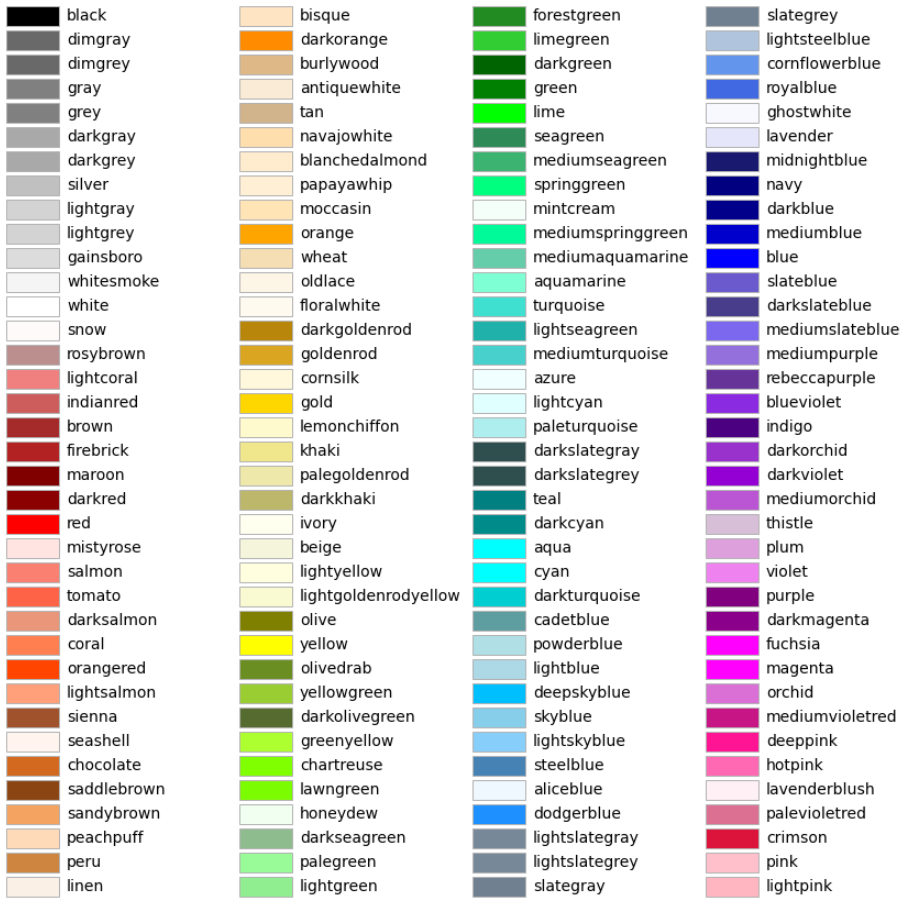

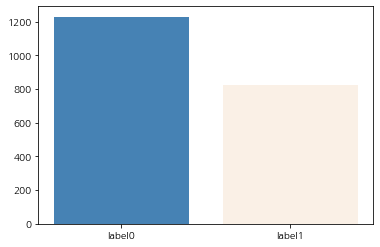

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2)
label = ['label0', 'label1']
values = [count_com0, count_com1]

plt.bar(x, values, color=['steelblue', 'linen'])
plt.xticks(x, label)

plt.show()

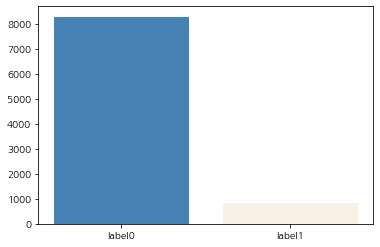

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2)
label = ['label0', 'label1']
values = [8272, 821]

plt.bar(x, values, color=['steelblue', 'linen'])
plt.xticks(x, label)

plt.show()

In [ ]:
x = df_total.drop(columns=['회사명', '거래소코드', '회계년도', 'y'], errors='ignore')

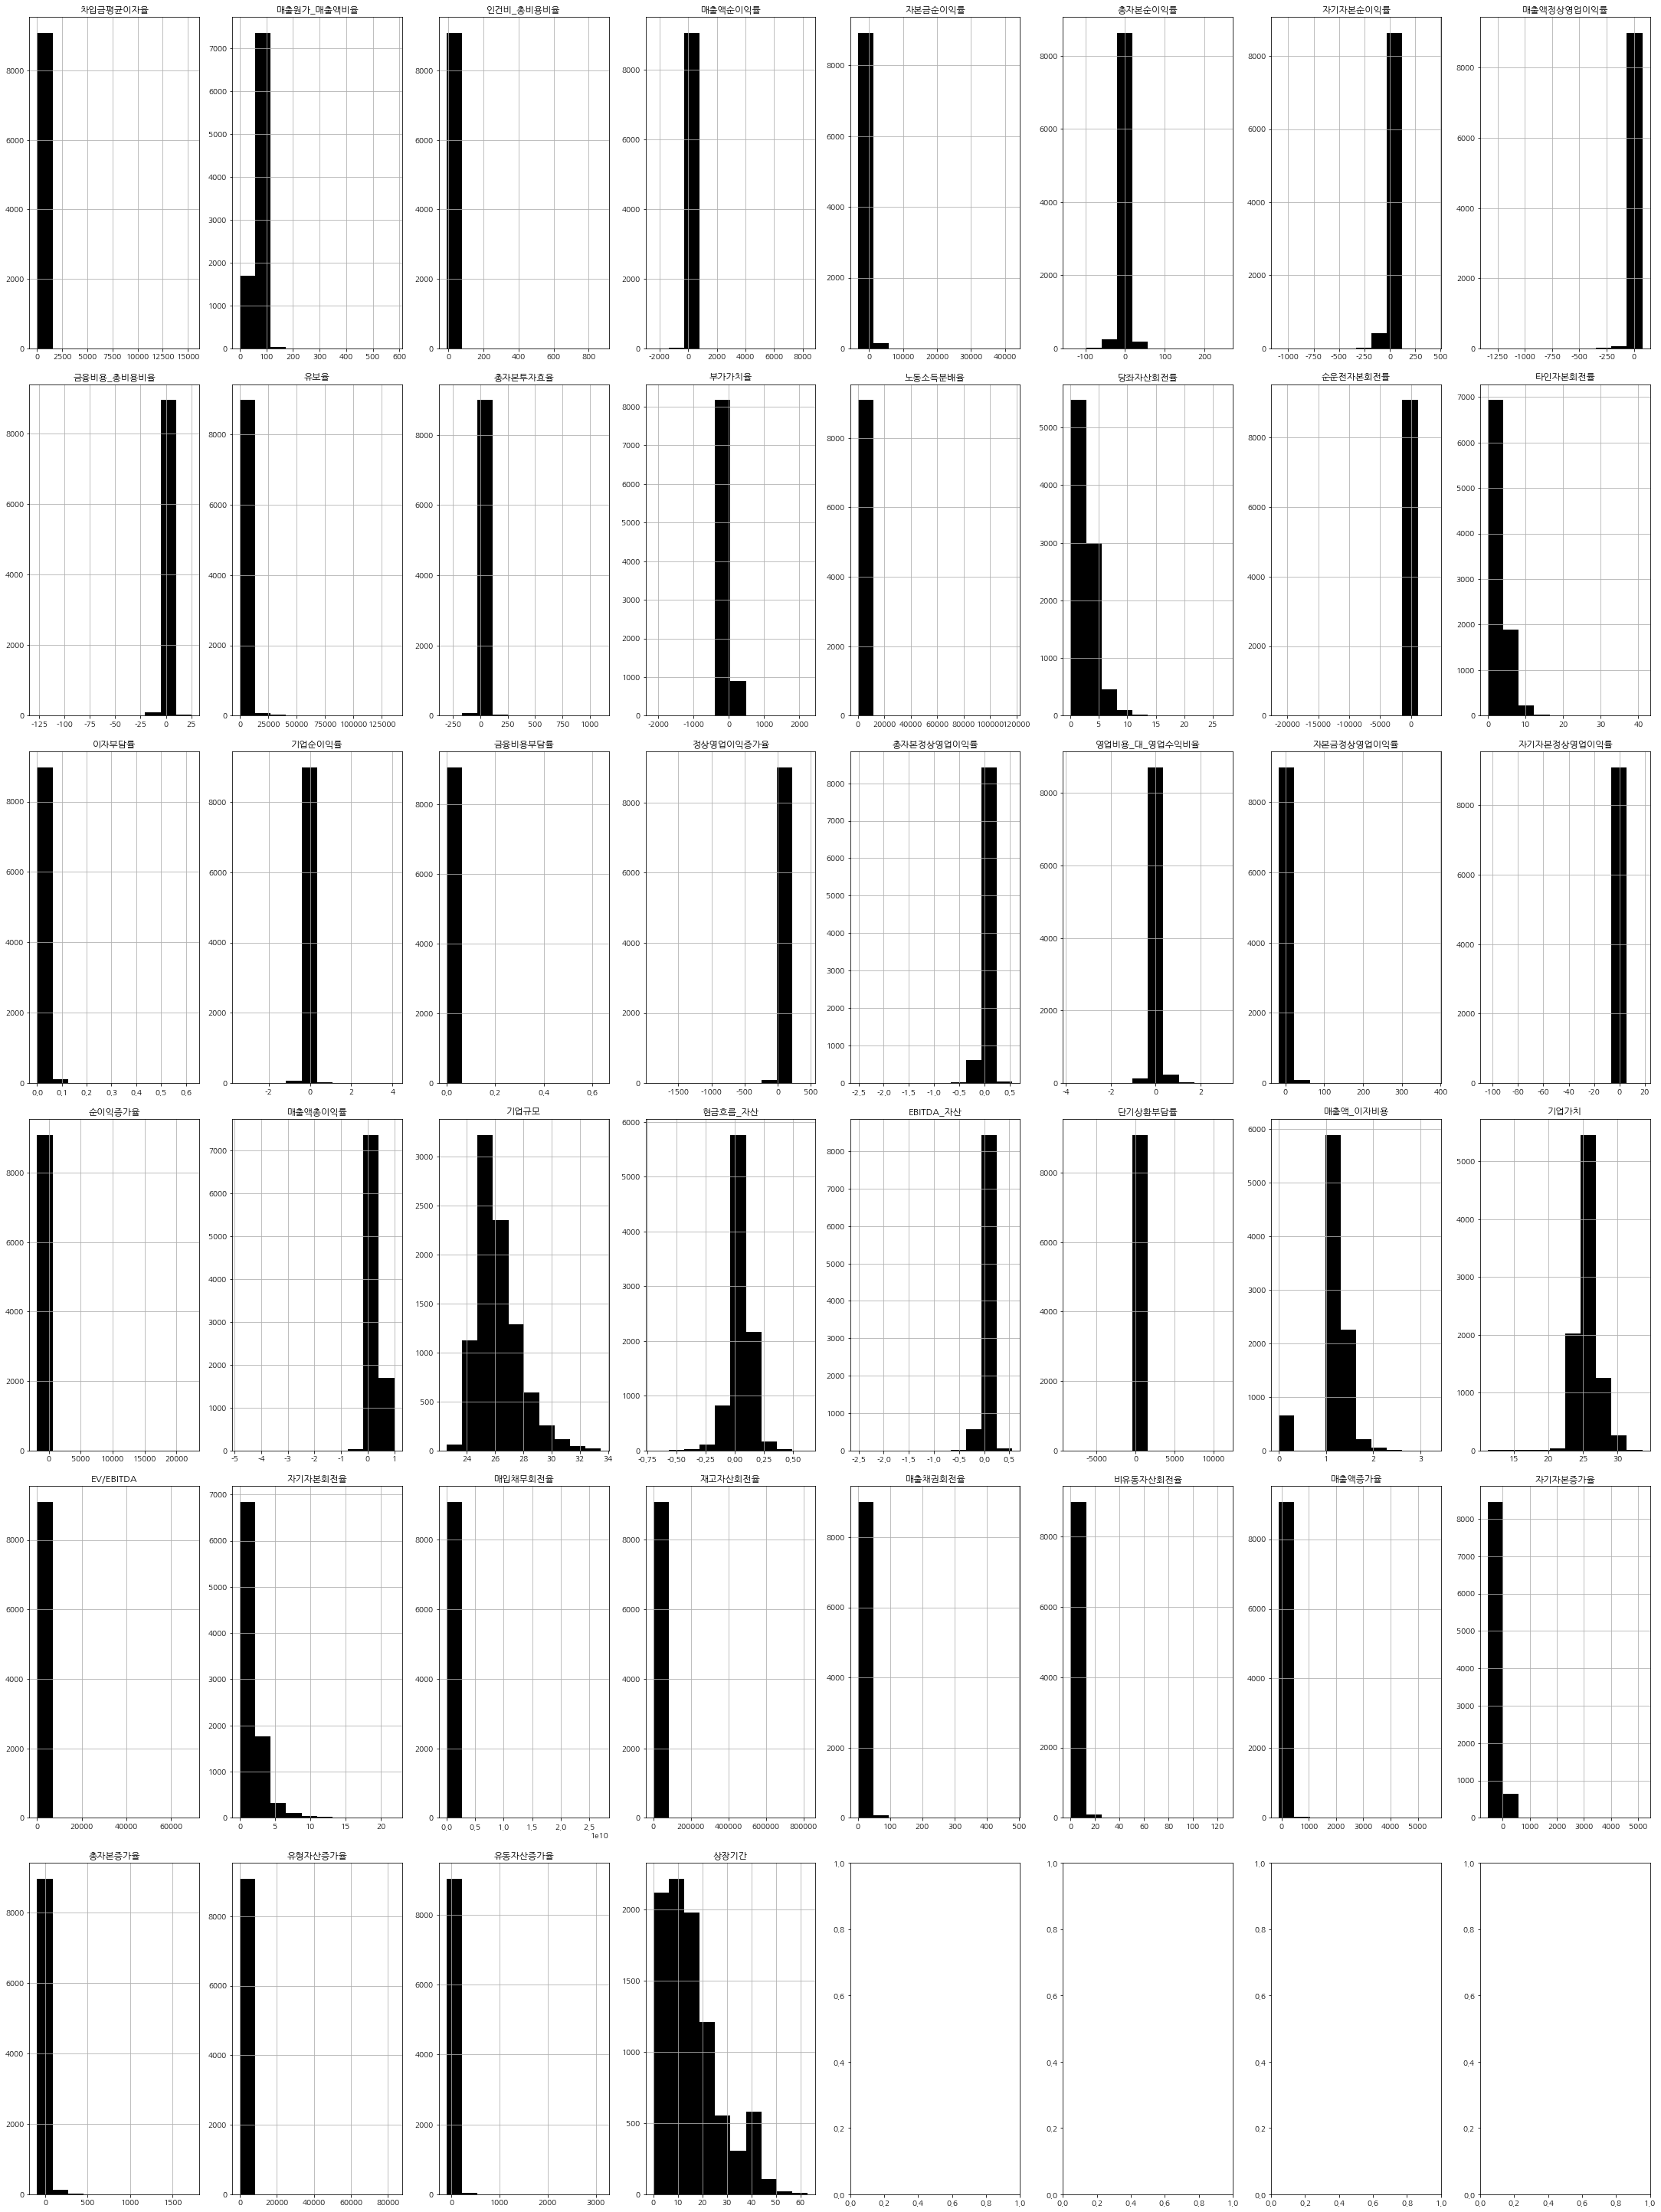

In [ ]:
ncols = 8
nrows = 6

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((30, 40))

for col, ax in zip(x.columns[:], axs.ravel()):
    x[[col]].hist(ax=ax, color='black')
    
plt.show()

# 1.boxplot

In [ ]:
import seaborn as sns 

In [ ]:
len(df_total.columns)

48

In [ ]:
x = df_total.iloc[:, 4:]
x

,차입금평균이자율,매출원가_매출액비율,인건비_총비용비율,매출액순이익률,자본금순이익률,총자본순이익률,자기자본순이익률,매출액정상영업이익률,금융비용_총비용비율,유보율,...,매입채무회전율,재고자산회전율,매출채권회전율,비유동자산회전율,매출액증가율,자기자본증가율,총자본증가율,유형자산증가율,유동자산증가율,상장기간
0,5.45000,71.66000,20.41000,-40.97000,-24.28000,-15.78000,-26.84000,-25.87000,1.78000,-4.31000,...,7.83000,5.71000,1.85000,1.48000,-8.43285,75.17467,109.15000,-4.13061,207.07907,11
1,7.71000,83.38000,20.38000,-17.74000,-45.89000,-7.59000,-27.74000,-7.81000,7.77000,80.99000,...,20.51000,7.04000,6.12000,0.56000,-10.93908,-22.60060,-13.19000,-7.89108,-10.08197,36
2,4.60000,77.11000,10.12000,-18.13000,-9.40000,-5.61000,-5.54000,-3.59000,1.72000,68.98000,...,31.55000,3.84000,11.85000,0.55000,-5.54468,-2.84000,6.17000,30.78114,-11.70892,16
3,6.60000,92.15000,6.48000,-3.35000,-40.31000,-1.33000,-5.07000,3.73000,5.45000,672.79000,...,10.41000,8.86000,10.97000,0.61000,-8.72142,-4.54767,-6.49000,-1.53021,-13.26448,4
4,4.56000,87.33000,8.29000,11.30000,162.34000,5.32000,16.85000,4.84000,5.00000,939.04000,...,6573.65000,3.76000,5.98000,0.73000,4.06907,15.64595,-3.49000,-1.99187,-13.66127,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,2.29000,94.67000,2.35000,1.51000,145.18000,2.77000,3.17000,0.67000,0.02000,4557.31000,...,17957666541.82272,68.96000,29.72000,2.24000,-7.26397,1.39388,1.39000,-5.61343,7.35849,22
9089,2.12000,94.93000,2.10000,1.33000,137.65000,2.60000,2.97000,0.48000,0.07000,4595.77000,...,252212280.04736,58.96000,27.11000,2.42000,8.11730,0.83263,0.98000,-0.56503,7.34081,23
9090,2.88000,95.00000,2.12000,1.43000,157.99000,3.06000,3.38000,0.66000,-0.01000,4641.63000,...,489070908.79666,78.35000,31.01000,2.62000,6.87449,0.98632,-5.89000,-0.35945,-21.19018,24
9091,0.00000,94.86000,2.23000,5.50000,552.86000,10.44000,11.25000,0.33000,-0.12000,5078.89000,...,1339634880.41255,68.41000,31.51000,2.44000,-9.34913,9.31121,11.24000,-7.00531,80.74311,25


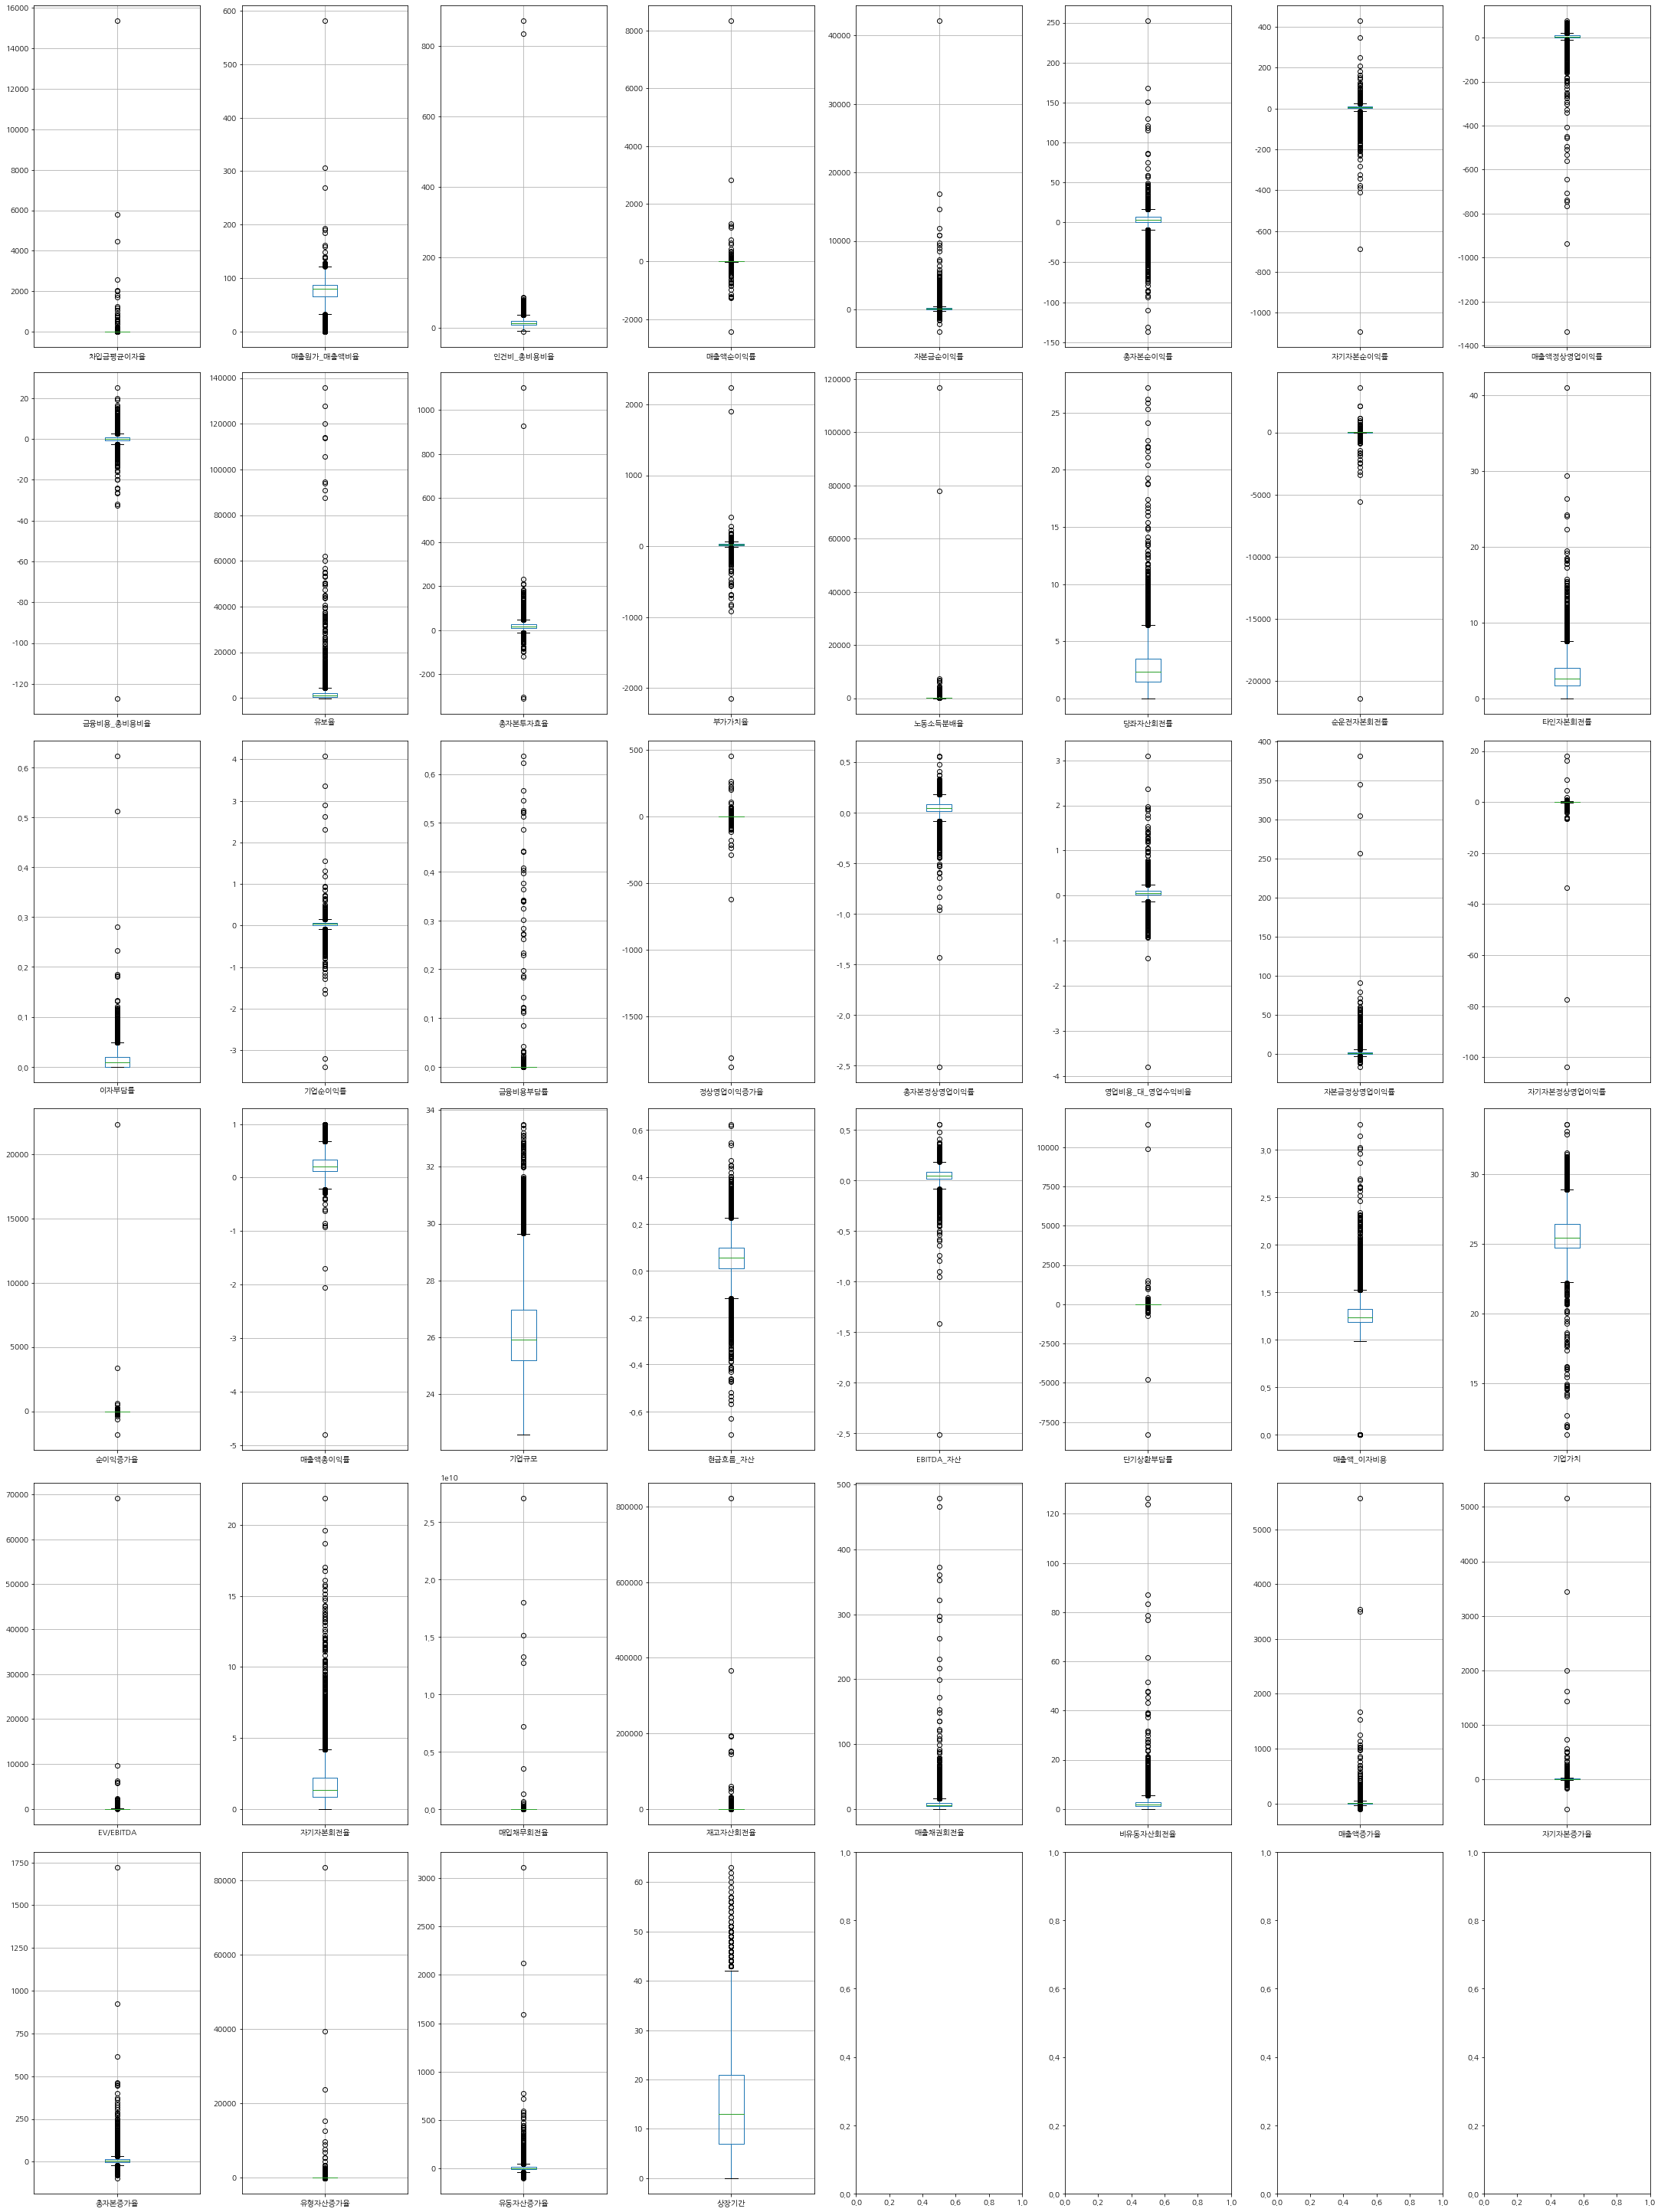

In [ ]:
ncols = 8
nrows = 6

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((30, 40))

for col, ax in zip(x.columns[:], axs.ravel()):
    x[[col]].boxplot(ax=ax)
    
plt.show()

## 1_1. winsorizing

In [ ]:
x = df_total.iloc[:, 4:]
x_win = x.copy()

In [ ]:
x_win.columns

Index(['차입금평균이자율', '매출원가_매출액비율', '인건비_총비용비율', '매출액순이익률', '자본금순이익률', '총자본순이익률',
       '자기자본순이익률', '매출액정상영업이익률', '금융비용_총비용비율', '유보율', '총자본투자효율', '부가가치율',
       '노동소득분배율', '당좌자산회전률', '순운전자본회전률', '타인자본회전률', '이자부담률', '기업순이익률',
       '금융비용부담률', '정상영업이익증가율', '총자본정상영업이익률', '영업비용_대_영업수익비율', '자본금정상영업이익률',
       '자기자본정상영업이익률', '순이익증가율', '매출액총이익률', '기업규모', '현금흐름_자산', 'EBITDA_자산',
       '단기상환부담률', '매출액_이자비용', '기업가치', 'EV/EBITDA', '자기자본회전율', '매입채무회전율',
       '재고자산회전율', '매출채권회전율', '비유동자산회전율', '매출액증가율', '자기자본증가율', '총자본증가율',
       '유형자산증가율', '유동자산증가율', '상장기간'],
      dtype='object')

In [ ]:
x_win.rename(columns={'EV/EBITDA' : 'EV_EBITDA'}, inplace=True)

In [ ]:
x_win.columns

Index(['차입금평균이자율', '매출원가_매출액비율', '인건비_총비용비율', '매출액순이익률', '자본금순이익률', '총자본순이익률',
       '자기자본순이익률', '매출액정상영업이익률', '금융비용_총비용비율', '유보율', '총자본투자효율', '부가가치율',
       '노동소득분배율', '당좌자산회전률', '순운전자본회전률', '타인자본회전률', '이자부담률', '기업순이익률',
       '금융비용부담률', '정상영업이익증가율', '총자본정상영업이익률', '영업비용_대_영업수익비율', '자본금정상영업이익률',
       '자기자본정상영업이익률', '순이익증가율', '매출액총이익률', '기업규모', '현금흐름_자산', 'EBITDA_자산',
       '단기상환부담률', '매출액_이자비용', '기업가치', 'EV_EBITDA', '자기자본회전율', '매입채무회전율',
       '재고자산회전율', '매출채권회전율', '비유동자산회전율', '매출액증가율', '자기자본증가율', '총자본증가율',
       '유형자산증가율', '유동자산증가율', '상장기간'],
      dtype='object')

In [ ]:
# boxplot에서 보이는 이상치 winsorizing 활용
from scipy.stats.mstats import winsorize
x_win['차입금평균이자율'] = winsorize(x_win['차입금평균이자율'], limits=[0, 0.01])
x_win['매출원가_매출액비율'] = winsorize(x_win['매출원가_매출액비율'], limits=[0, 0.01])
x_win['인건비_총비용비율'] = winsorize(x_win['인건비_총비용비율'], limits=[0, 0.01])
x_win['매출액순이익률'] = winsorize(x_win['매출액순이익률'], limits=[0.005, 0.005])
x_win['자본금순이익률'] = winsorize(x_win['자본금순이익률'], limits=[0, 0.01])
x_win['총자본순이익률'] = winsorize(x_win['총자본순이익률'], limits=[0.005, 0.005])
x_win['자기자본순이익률'] = winsorize(x_win['자기자본순이익률'], limits=[0.005, 0.005])
x_win['매출액정상영업이익률'] = winsorize(x_win['매출액정상영업이익률'], limits=[0.01, 0])
x_win['금융비용_총비용비율'] = winsorize(x_win['금융비용_총비용비율'], limits=[0.01, 0])
x_win['유보율'] = winsorize(x_win['유보율'], limits=[0, 0.01])
x_win['총자본투자효율'] = winsorize(x_win['총자본투자효율'], limits=[0, 0.005])
x_win['부가가치율'] = winsorize(x_win['부가가치율'], limits=[0.005, 0.005])
x_win['노동소득분배율'] = winsorize(x_win['노동소득분배율'], limits=[0, 0.01])
x_win['당좌자산회전률'] = winsorize(x_win['당좌자산회전률'], limits=[0, 0.01])
x_win['순운전자본회전률'] = winsorize(x_win['순운전자본회전률'], limits=[0.005, 0.005])
x_win['타인자본회전률'] = winsorize(x_win['타인자본회전률'], limits=[0, 0.01])
x_win['이자부담률'] = winsorize(x_win['이자부담률'], limits=[0, 0.01])
x_win['기업순이익률'] = winsorize(x_win['기업순이익률'], limits=[0.005, 0.005])
# x_win['금융비용부담률'] = winsorize(x_win['금융비용부담률'], limits=[0, 0])
x_win['정상영업이익증가율'] = winsorize(x_win['정상영업이익증가율'], limits=[0.005, 0.005])
x_win['총자본정상영업이익률'] = winsorize(x_win['총자본정상영업이익률'], limits=[0.01, 0])
x_win['영업비용_대_영업수익비율'] = winsorize(x_win['영업비용_대_영업수익비율'], limits=[0.005, 0.005])
x_win['자본금정상영업이익률'] = winsorize(x_win['자본금정상영업이익률'], limits=[0, 0.01])
x_win['자기자본정상영업이익률'] = winsorize(x_win['자기자본정상영업이익률'], limits=[0.005, 0.005])
x_win['순이익증가율'] = winsorize(x_win['순이익증가율'], limits=[0.005, 0.005])
x_win['매출액총이익률'] = winsorize(x_win['매출액총이익률'], limits=[0.01, 0])
x_win['기업규모'] = winsorize(x_win['기업규모'], limits=[0, 0.005])
x_win['현금흐름_자산'] = winsorize(x_win['현금흐름_자산'], limits=[0.005, 0.005])
x_win['EBITDA_자산'] = winsorize(x_win['EBITDA_자산'], limits=[0.01, 0])
x_win['단기상환부담률'] = winsorize(x_win['단기상환부담률'], limits=[0.005, 0.005])
x_win['매출액_이자비용'] = winsorize(x_win['매출액_이자비용'], limits=[0.005, 0.005])
x_win['기업가치'] = winsorize(x_win['기업가치'], limits=[0.005, 0.005])
x_win['EV_EBITDA'] = winsorize(x_win['EV_EBITDA'], limits=[0, 0.01])
x_win['자기자본회전율'] = winsorize(x_win['자기자본회전율'], limits=[0, 0.01])
x_win['매입채무회전율'] = winsorize(x_win['매입채무회전율'], limits=[0, 0.01])
x_win['재고자산회전율'] = winsorize(x_win['재고자산회전율'], limits=[0, 0.01])
x_win['매출채권회전율'] = winsorize(x_win['매출채권회전율'], limits=[0, 0.01])
x_win['비유동자산회전율'] = winsorize(x_win['비유동자산회전율'], limits=[0, 0.01])
x_win['매출액증가율'] = winsorize(x_win['매출액증가율'], limits=[0, 0.01])
x_win['자기자본증가율'] = winsorize(x_win['자기자본증가율'], limits=[0, 0.005])
x_win['총자본증가율'] = winsorize(x_win['총자본증가율'], limits=[0, 0.01])
x_win['유형자산증가율'] = winsorize(x_win['유형자산증가율'], limits=[0, 0.01])
x_win['유동자산증가율'] = winsorize(x_win['유동자산증가율'], limits=[0, 0.01])
# x_win['상장기간'] = winsorize(x_win['상장기간'], limits=[0, 0])

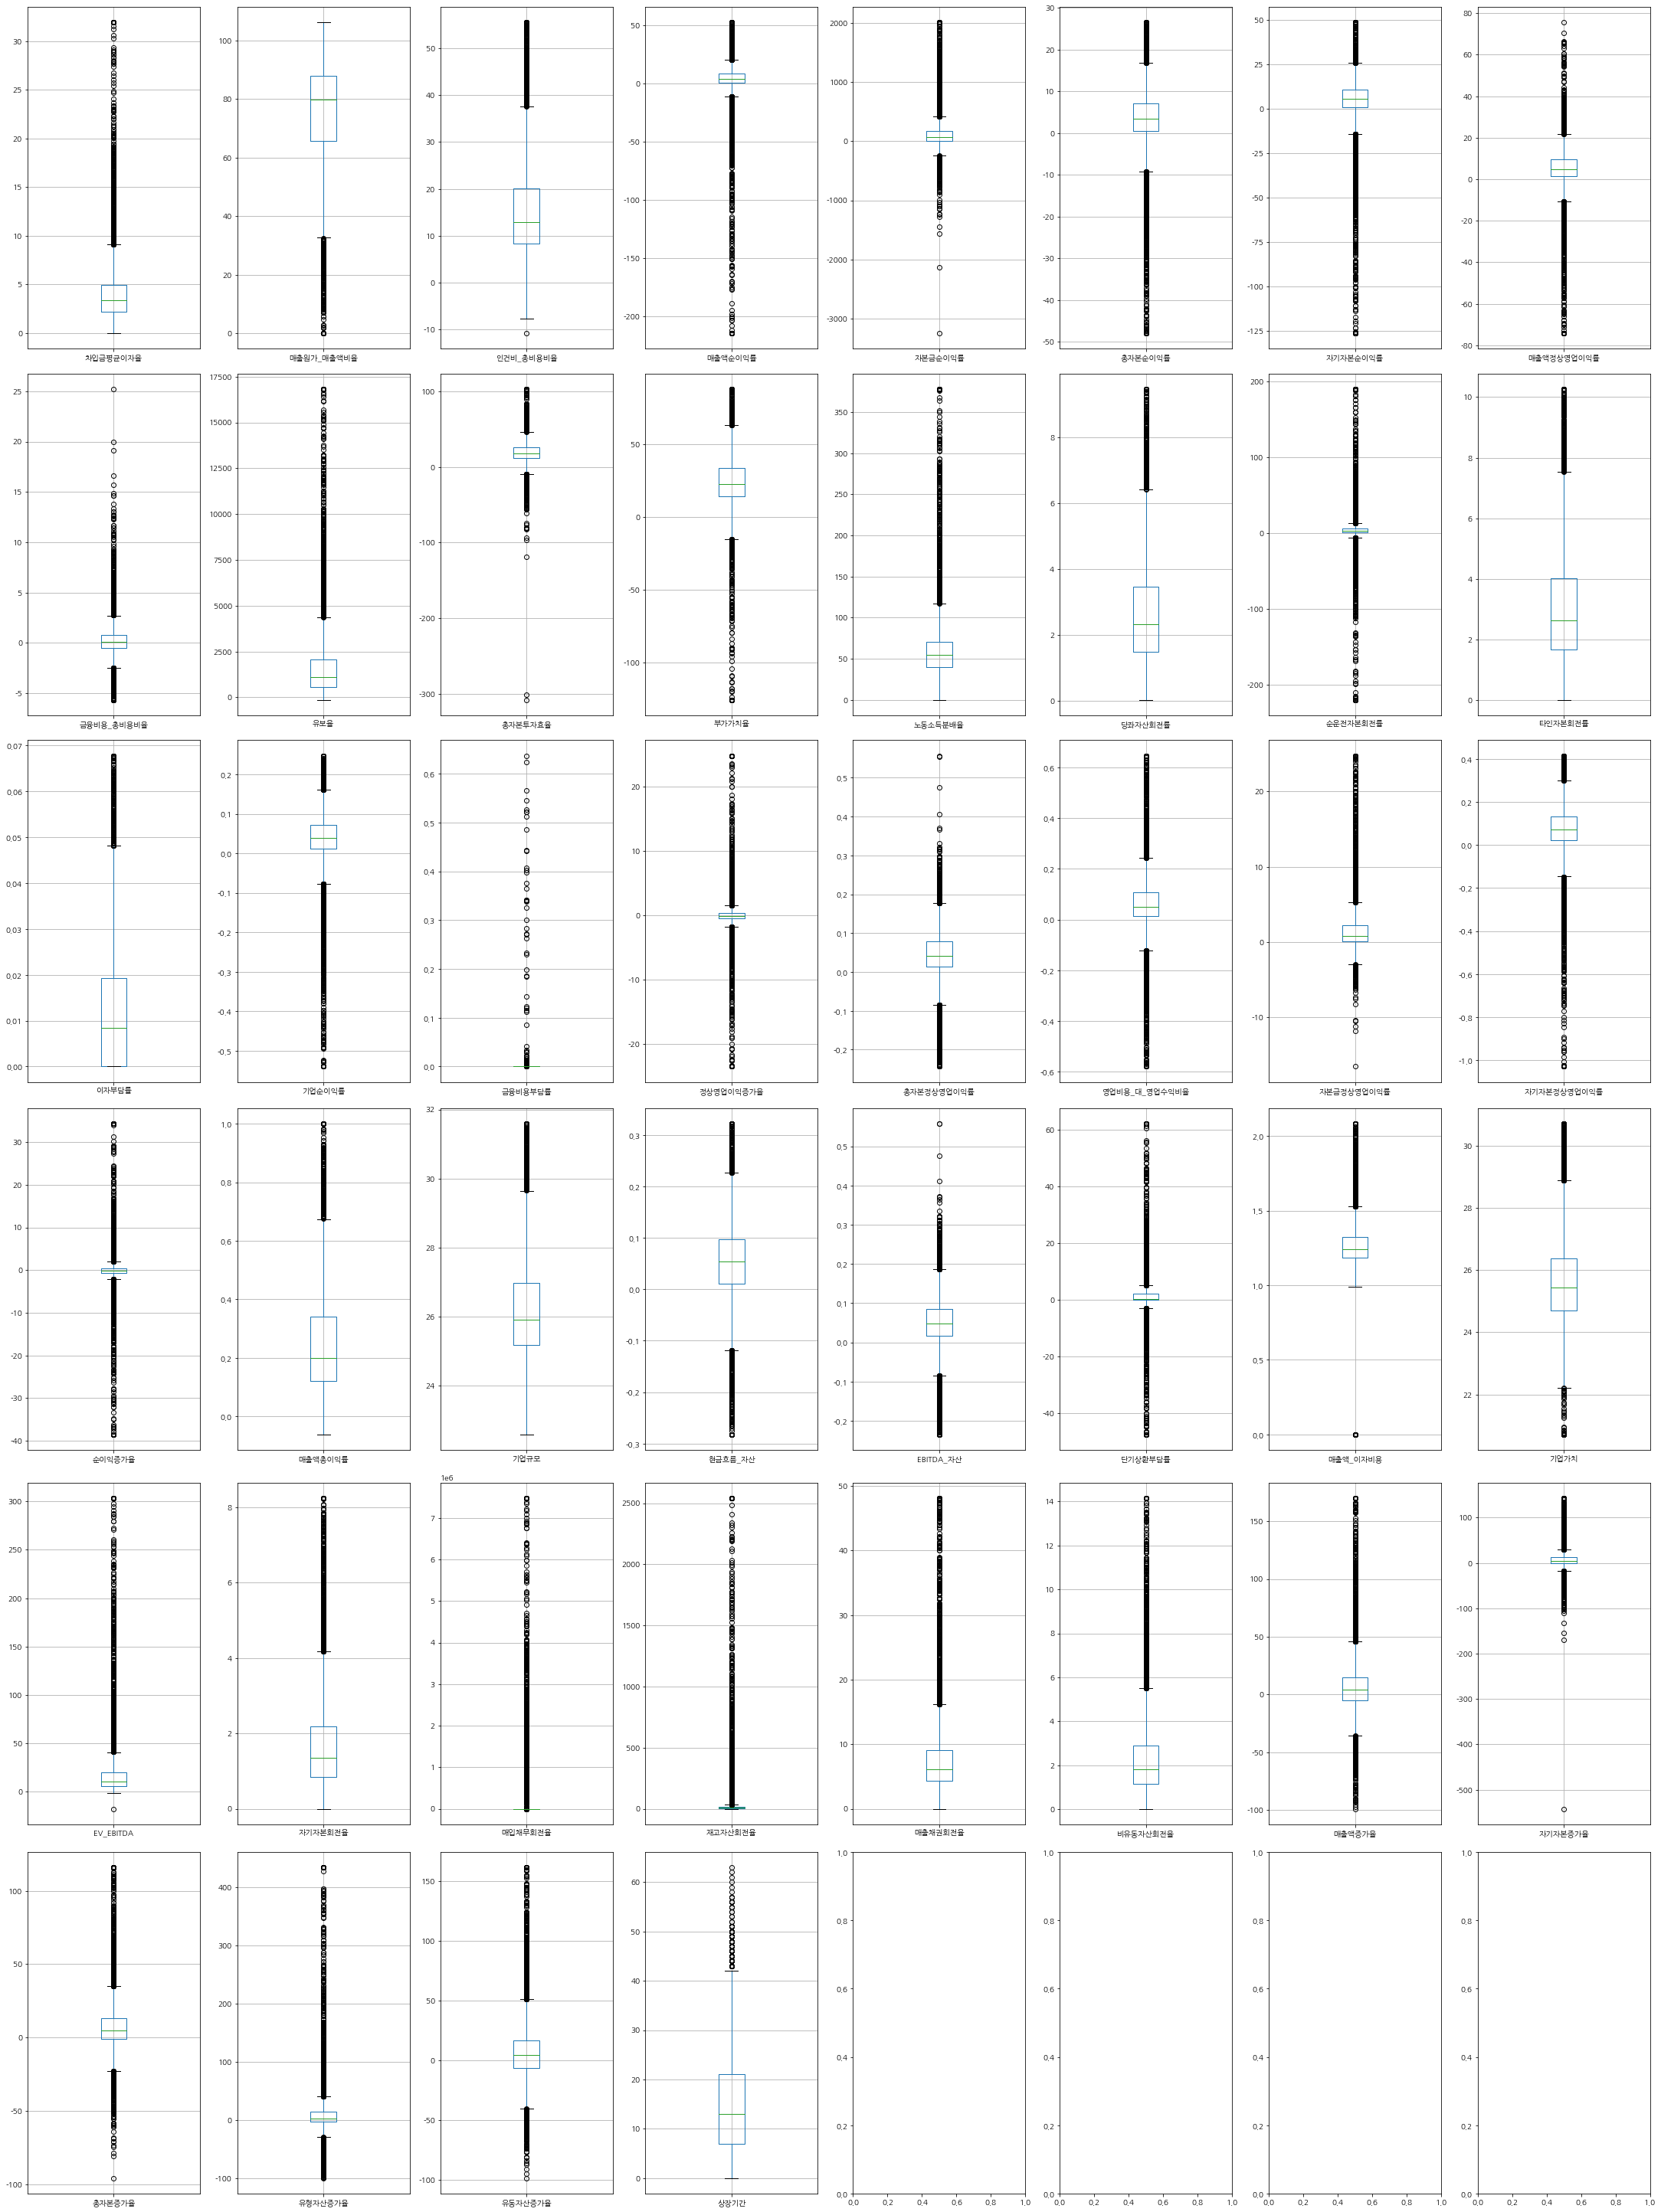

In [ ]:
ncols = 8
nrows = 6

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((30, 40))

for col, ax in zip(x_win.columns[:], axs.ravel()):
    x_win[[col]].boxplot(ax=ax)
    
plt.show()

In [ ]:
x = x_win.copy()

In [ ]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
차입금평균이자율,9093.00000,4.19155,4.35971,0.00000,2.18000,3.38000,4.96000,31.92000
매출원가_매출액비율,9093.00000,73.06242,22.68807,0.00000,65.82000,79.97000,88.00000,106.23000
인건비_총비용비율,9093.00000,15.49987,10.59033,-10.80000,8.35000,12.88000,20.04000,55.54000
매출액순이익률,9093.00000,1.02767,24.36261,-214.35000,0.59000,3.85000,8.46000,52.46000
자본금순이익률,9093.00000,133.65779,319.31032,-3248.63000,7.11000,64.09000,173.95000,2010.48000
총자본순이익률,9093.00000,2.69887,9.16044,-47.93000,0.56000,3.51000,7.07000,26.52000
자기자본순이익률,9093.00000,3.13102,18.69200,-126.37000,1.04000,5.77000,11.06000,48.80000
매출액정상영업이익률,9093.00000,4.35233,13.70874,-74.16000,1.50000,4.82000,9.66000,75.57000
금융비용_총비용비율,9093.00000,0.17189,1.86841,-5.65000,-0.52000,0.10000,0.78000,25.22000
유보율,9093.00000,1827.61826,2455.15978,-138.10000,553.42000,1097.09000,2083.83000,16823.17000


In [ ]:
x.to_csv('/content/drive/MyDrive/project2/datasets2/real_win_data.csv')

# feature_selection으로 이동

## 1_2. Scaling

> 변수명 설정
- standard scaler : st_scaled
- minmax scaler : mm_scaled
- robust scaler : rb_scaled
- maxabs scaler : ma_scaled

### 1_2_1. Standard_Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

x.feature = x.columns 

# StandardScaler객체 생성
st_scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
st_scaler.fit(x)
data_st_scaled = st_scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
st_scaled = pd.DataFrame(data = data_st_scaled, columns=x.feature)

# 인덱스가 달라서 똑같이 설정
st_scaled.index = x.index 

st_scaled

,차입금평균이자율,매출원가_매출액비율,인건비_총비용비율,매출액순이익률,자본금순이익률,총자본순이익률,자기자본순이익률,매출액정상영업이익률,금융비용_총비용비율,유보율,...,재고자산회전율,매출채권회전율,비유동자산회전율,매출액증가율,자기자본증가율,총자본증가율,유형자산증가율,유동자산증가율,상장기간,금융비용부담률
0,0.60907,-1.05030,0.25249,0.02754,-0.08124,-0.23557,-0.06880,0.27614,-0.35044,-0.79007,...,-0.16260,-0.64689,-0.39195,1.17696,-0.25926,-0.26399,-0.22210,0.10689,-0.37326,-0.05082
1,0.05115,-0.37474,0.75374,-0.84206,-0.18718,-1.07668,-0.69326,-0.92521,0.15814,-0.77814,...,-0.16523,-0.71863,-0.34527,-0.38718,1.76528,3.01071,-0.21048,3.79029,-0.27407,-0.05082
2,2.08964,-0.35370,1.16528,0.01442,-0.29200,-0.48873,-0.21448,-0.14971,-1.11332,-0.56793,...,-0.14913,-0.42926,0.12618,0.33806,-0.41408,-0.49041,-0.00098,-0.16156,-0.47244,-0.05082
3,6.21222,-0.35871,1.48262,0.23805,-0.03132,0.16025,0.21955,0.13554,-1.00296,-0.56079,...,-0.14357,0.51775,0.07016,-0.06665,-0.16536,-0.36208,-0.35545,-0.88481,-0.37326,-0.05082
4,3.27713,-0.19545,0.65730,-0.49685,-0.71192,-2.68056,-1.15185,0.04793,-0.88301,-0.65753,...,-0.14728,0.87528,0.65364,-0.07056,-0.04111,-0.26796,-0.39048,1.10404,-0.27407,-0.05082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,0.28560,0.73451,-1.11108,0.31840,0.25089,0.49587,0.64618,0.23131,0.16774,-0.52633,...,0.02374,2.34363,-0.14456,-0.03955,0.43911,-0.10968,-0.23127,0.71296,2.30474,-0.05082
2378,0.33119,0.76356,-0.95633,0.31465,0.22991,0.47278,0.59235,0.22071,0.08617,-0.50049,...,0.03532,2.17264,-0.16790,-0.01073,-0.00285,0.09382,0.11291,-0.50201,2.40393,-0.05082
2379,0.67637,0.73401,-0.85317,0.28840,0.11583,0.34496,0.41772,0.23131,0.34526,-0.48833,...,0.06763,2.08894,-0.34994,-0.12536,-0.11750,0.34560,0.14023,-0.45349,2.50311,-0.05082
2380,1.18437,0.81965,-0.62553,0.20002,-0.23690,0.06294,-0.10648,0.15796,0.78668,-0.58756,...,0.02308,2.07818,-0.52265,-0.22191,0.08774,0.31963,0.07126,-0.72363,2.60230,-0.05082


In [ ]:
st_scaled['차입금평균이자율'].values

array([0.6090717 , 0.05114514, 2.08963945, ..., 0.67637023, 1.18436562,
       1.40579951])

### 1_2_2. MinMax_Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

x.feature = x.columns 

# MinMaxScaler객체 생성
mm_scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
mm_scaler.fit(x)
data_mm_scaler = mm_scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
mm_scaled = pd.DataFrame(data = data_mm_scaler, columns=x.feature)

# 인덱스가 달라서 똑같이 설정
mm_scaled.index = x.index 

mm_scaled

,차입금평균이자율,매출원가_매출액비율,인건비_총비용비율,매출액순이익률,자본금순이익률,총자본순이익률,자기자본순이익률,매출액정상영업이익률,금융비용_총비용비율,유보율,...,재고자산회전율,매출채권회전율,비유동자산회전율,매출액증가율,자기자본증가율,총자본증가율,유형자산증가율,유동자산증가율,상장기간,금융비용부담률
0,0.17615,0.42386,0.25602,0.85986,0.46039,0.66254,0.74671,0.90710,0.30674,0.00393,...,0.00211,0.02372,0.07802,0.33608,0.20684,0.19236,0.04758,0.17318,0.18750,0.00000
1,0.11970,0.52215,0.32782,0.76189,0.44820,0.55187,0.67760,0.78741,0.36629,0.00530,...,0.00188,0.01638,0.08398,0.17659,0.42229,0.56475,0.04857,0.55814,0.20833,0.00000
2,0.32594,0.52521,0.38677,0.85838,0.43614,0.62923,0.73059,0.86467,0.21742,0.02949,...,0.00330,0.04597,0.14413,0.25054,0.19036,0.16661,0.06656,0.14512,0.16667,0.00000
3,0.74303,0.52448,0.43222,0.88357,0.46613,0.71463,0.77863,0.89309,0.23034,0.03031,...,0.00379,0.14279,0.13699,0.20927,0.21683,0.18121,0.03613,0.06954,0.18750,0.00000
4,0.44608,0.54824,0.31401,0.80078,0.38783,0.34082,0.62685,0.88436,0.24438,0.01918,...,0.00346,0.17934,0.21144,0.20888,0.23005,0.19191,0.03312,0.27739,0.20833,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,0.14342,0.68355,0.06071,0.89262,0.49861,0.75879,0.82584,0.90264,0.36742,0.03428,...,0.01861,0.32946,0.10959,0.21204,0.28116,0.20991,0.04679,0.23652,0.75000,0.00000
2378,0.14803,0.68777,0.08288,0.89220,0.49619,0.75575,0.81988,0.90158,0.35787,0.03725,...,0.01963,0.31198,0.10661,0.21498,0.23413,0.23305,0.07634,0.10954,0.77083,0.00000
2379,0.18296,0.68347,0.09765,0.88924,0.48307,0.73893,0.80056,0.90264,0.38820,0.03865,...,0.02249,0.30342,0.08338,0.20329,0.22192,0.26168,0.07869,0.11461,0.79167,0.00000
2380,0.23435,0.69593,0.13026,0.87929,0.44248,0.70182,0.74254,0.89533,0.43989,0.02723,...,0.01855,0.30232,0.06135,0.19344,0.24377,0.25873,0.07277,0.08638,0.81250,0.00000


### 1_2_3. Robust_Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

x.feature = x.columns 

# RobustScaler객체 생성
rb_scaler = RobustScaler()

# RobustScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
rb_scaler.fit(x)
data_rb_scaler = rb_scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
rb_scaled = pd.DataFrame(data = data_rb_scaler, columns=x.feature)

# 인덱스가 달라서 똑같이 설정
rb_scaled.index = x.index 

rb_scaled

,차입금평균이자율,매출원가_매출액비율,인건비_총비용비율,매출액순이익률,자본금순이익률,총자본순이익률,자기자본순이익률,매출액정상영업이익률,금융비용_총비용비율,유보율,...,재고자산회전율,매출채권회전율,비유동자산회전율,매출액증가율,자기자본증가율,총자본증가율,유형자산증가율,유동자산증가율,상장기간,금융비용부담률
0,1.26389,-1.47862,0.48191,-0.85243,-0.11924,-0.75770,-0.54293,0.17342,-0.18254,-0.69827,...,-0.12086,-0.80300,-0.16860,2.14952,-0.25171,-0.11377,-0.41448,0.48345,-0.07692,0.00000
1,0.37153,-0.71203,0.99540,-3.91419,-0.28494,-2.02675,-1.60699,-3.55823,0.37831,-0.68263,...,-0.19679,-0.94124,-0.11047,-0.44327,3.70037,5.08551,-0.32670,6.61773,0.00000,0.00000
2,3.63194,-0.68817,1.41700,-0.89863,-0.44891,-1.13966,-0.79117,-1.14937,-1.02381,-0.40705,...,0.26738,-0.38364,0.47674,0.75893,-0.55393,-0.47326,1.25592,0.03638,-0.15385,0.00000
3,10.22569,-0.69385,1.74210,-0.11127,-0.04116,-0.16050,-0.05160,-0.26329,-0.90212,-0.39769,...,0.42781,1.44124,0.40698,0.08805,-0.06841,-0.26950,-1.42177,-1.16810,-0.07692,0.00000
4,5.53125,-0.50859,0.89661,-2.69873,-1.10575,-4.44666,-2.38842,-0.53544,-0.76984,-0.52451,...,0.32086,2.13018,1.13372,0.08157,0.17415,-0.12007,-1.68645,2.14409,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,0.74653,0.54667,-0.91499,0.17162,0.40027,0.34588,0.67536,0.03418,0.38889,-0.35251,...,5.25134,4.95968,0.13953,0.13298,1.11158,0.13123,-0.48373,1.49279,2.00000,0.00000
2378,0.81944,0.57963,-0.75646,0.15842,0.36746,0.31104,0.58363,0.00127,0.29894,-0.31864,...,5.58503,4.63018,0.11047,0.18074,0.24883,0.45434,2.11623,-0.53060,2.07692,0.00000
2379,1.37153,0.54610,-0.65078,0.06601,0.18901,0.11820,0.28608,0.03418,0.58466,-0.30270,...,6.51658,4.46889,-0.11628,-0.00927,0.02503,0.85409,2.32258,-0.44978,2.15385,0.00000
2380,2.18403,0.64327,-0.41758,-0.24517,-0.36273,-0.30731,-0.60714,-0.19367,1.07143,-0.43279,...,5.23209,4.44816,-0.33140,-0.16931,0.42567,0.81286,1.80163,-0.89967,2.23077,0.00000


### 1_2_4. MaxAbs_Scaling

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

x.feature = x.columns 

# RobustScaler객체 생성
ma_scaler = MaxAbsScaler()

# MaxAbsScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
ma_scaler.fit(x)
data_ma_scaler = ma_scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
ma_scaled = pd.DataFrame(data = data_ma_scaler, columns=x.feature)

# 인덱스가 달라서 똑같이 설정
ma_scaled.index = x.index 

ma_scaled

,차입금평균이자율,매출원가_매출액비율,인건비_총비용비율,매출액순이익률,자본금순이익률,총자본순이익률,자기자본순이익률,매출액정상영업이익률,금융비용_총비용비율,유보율,...,재고자산회전율,매출채권회전율,비유동자산회전율,매출액증가율,자기자본증가율,총자본증가율,유형자산증가율,유동자산증가율,상장기간,금융비용부담률
0,0.17615,0.42386,0.25602,-0.02896,-0.00944,-0.08373,-0.03965,0.01642,0.05513,-0.00183,...,0.00211,0.02977,0.08185,0.17285,-0.00714,0.00845,-0.00350,0.04154,0.20408,0.00000
1,0.11970,0.52215,0.32782,-0.13959,-0.03224,-0.23679,-0.12854,-0.11770,0.13629,-0.00045,...,0.00188,0.02248,0.08778,-0.02584,0.26644,0.46564,-0.00245,0.48779,0.22449,0.00000
2,0.32594,0.52521,0.38677,-0.03063,-0.05481,-0.12980,-0.06039,-0.03112,-0.06662,0.02388,...,0.00330,0.05188,0.14769,0.06629,-0.02807,-0.02316,0.01650,0.00902,0.18367,0.00000
3,0.74303,0.52448,0.43222,-0.00218,0.00130,-0.01170,0.00139,0.00073,-0.04900,0.02470,...,0.00379,0.14810,0.14057,0.01487,0.00554,-0.00525,-0.01557,-0.07860,0.20408,0.00000
4,0.44608,0.54824,0.31401,-0.09567,-0.14519,-0.52866,-0.19381,-0.00905,-0.02986,0.01351,...,0.00346,0.18442,0.21471,0.01438,0.02234,0.00789,-0.01874,0.16235,0.22449,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,0.14342,0.68355,0.06071,0.00804,0.06204,0.04937,0.06211,0.01142,0.13783,0.02869,...,0.01861,0.33362,0.11329,0.01832,0.08723,0.02999,-0.00433,0.11497,0.75510,0.00000
2378,0.14803,0.68777,0.08288,0.00756,0.05753,0.04517,0.05445,0.01024,0.12481,0.03168,...,0.01963,0.31624,0.11032,0.02198,0.02751,0.05840,0.02681,-0.03222,0.77551,0.00000
2379,0.18296,0.68347,0.09765,0.00422,0.03297,0.02191,0.02960,0.01142,0.16616,0.03309,...,0.02249,0.30774,0.08719,0.00742,0.01201,0.09355,0.02928,-0.02635,0.79592,0.00000
2380,0.23435,0.69593,0.13026,-0.00702,-0.04295,-0.02941,-0.04502,0.00323,0.23660,0.02160,...,0.01855,0.30665,0.06524,-0.00485,0.03975,0.08993,0.02304,-0.05907,0.81633,0.00000


# 2.다중공선성 확인 (Heatmap, VIF)

### 2_1. VIF

In [ ]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

In [ ]:
# x VIF
vif(x).head(10)

,VIF Factor,features
0,586.73506,기업규모
1,424.11195,매출원가_매출액비율
2,164.06902,총자본정상영업이익률
3,153.33689,EBITDA_자산
4,53.76560,매출액총이익률
5,46.36500,총자본순이익률
6,40.38403,기업순이익률
7,32.59103,매출액_이자비용
8,20.71919,매출액순이익률
9,15.03485,영업비용_대_영업수익비율


### 2_2. heatmap

In [ ]:
# heatmap 그리기 전 초기작업
import seaborn as sns #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib
from matplotlib import rc

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300
#rc('font', family='AppleGothic') # Mac Os
rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# 상관행렬 시각화
mask_ut=np.triu(np.ones(x.corr().shape)).astype(bool)  # 배열 행렬에 위쪽 삼각형 반환 -> True
plt.figure(figsize=(30,30))
sns.heatmap(x.corr(method='pearson'), annot = True, cmap = 'YlGnBu', cbar_kws={"shrink": .5}, 
              annot_kws={"size": 10}, linewidths=.5, mask=mask_ut)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## X에서 다중공선성 변수들 제외 (df_exvif)

In [ ]:
# x VIF
vif(x).head(5)

,VIF Factor,features
0,586.73506,기업규모
1,424.11195,매출원가_매출액비율
2,164.06902,총자본정상영업이익률
3,153.33689,EBITDA_자산
4,53.76560,매출액총이익률


In [ ]:
# 매출원가_매출액비율
x_vif1 = x.drop('매출원가_매출액비율',axis = 1)
# vif 확인
vif(x_vif1).head()

,VIF Factor,features
0,162.19755,총자본정상영업이익률
1,151.76153,EBITDA_자산
2,46.97311,기업규모
3,46.34106,총자본순이익률
4,40.05016,기업순이익률


In [ ]:
# 기업규모
x_vif2 = x_vif1.drop('기업규모',axis = 1)
# vif 확인
vif(x_vif2).head()

,VIF Factor,features
0,161.64149,총자본정상영업이익률
1,151.18866,EBITDA_자산
2,46.31235,총자본순이익률
3,40.00991,기업순이익률
4,20.38517,매출액순이익률


In [ ]:
# 총자본정상영업이익률
x_vif3 = x_vif2.drop('총자본정상영업이익률',axis = 1)
# vif 확인
vif(x_vif3).head()

,VIF Factor,features
0,46.31232,총자본순이익률
1,39.41696,기업순이익률
2,19.91846,매출액순이익률
3,14.51942,EBITDA_자산
4,14.19331,영업비용_대_영업수익비율


In [ ]:
# 총자본순이익률
x_vif4 = x_vif3.drop('총자본순이익률',axis = 1)
# vif 확인
vif(x_vif4).head()

,VIF Factor,features
0,19.89412,매출액순이익률
1,13.93944,EBITDA_자산
2,13.90309,영업비용_대_영업수익비율
3,13.60014,매출액_이자비용
4,13.52106,부가가치율


In [ ]:
# 매출액순이익률
x_vif5 = x_vif4.drop('매출액순이익률',axis = 1)
# vif 확인
vif(x_vif5).head()

,VIF Factor,features
0,13.88131,영업비용_대_영업수익비율
1,13.55615,매출액_이자비용
2,12.19921,EBITDA_자산
3,10.26993,총자본투자효율
4,9.43823,기업순이익률


In [ ]:
# 영업비용_대_영업수익비율
x_vif6 = x_vif5.drop('영업비용_대_영업수익비율',axis = 1)
# vif 확인
vif(x_vif6).head()

,VIF Factor,features
0,13.55322,매출액_이자비용
1,10.15469,총자본투자효율
2,9.57340,EBITDA_자산
3,9.40788,기업순이익률
4,7.80193,당좌자산회전률


In [ ]:
# 매출액_이자비용
x_vif7 = x_vif6.drop('매출액_이자비용',axis = 1)
# vif 확인
vif(x_vif7).head()

,VIF Factor,features
0,10.15216,총자본투자효율
1,9.46268,EBITDA_자산
2,9.30676,기업순이익률
3,7.48749,자기자본순이익률
4,7.39935,당좌자산회전률


In [ ]:
# EBITDA_자산
x_vif8 = x_vif7.drop('EBITDA_자산',axis = 1)
# vif 확인
vif(x_vif8)

,VIF Factor,features
0,9.70937,총자본투자효율
1,7.38595,당좌자산회전률
2,7.32128,기업순이익률
3,7.02082,인건비_총비용비율
4,6.95011,자기자본순이익률
5,6.28473,자기자본회전율
6,6.13770,타인자본회전률
7,6.09637,부가가치율
8,5.00287,자본금정상영업이익률
9,4.28964,자기자본정상영업이익률


In [ ]:
a = vif(x_vif8)
x_vif_list = a['features'].unique()
x_vif_list

array(['총자본투자효율', '당좌자산회전률', '기업순이익률', '인건비_총비용비율', '자기자본순이익률', '자기자본회전율',
       '타인자본회전률', '부가가치율', '자본금정상영업이익률', '자기자본정상영업이익률', '비유동자산회전율',
       '자본금순이익률', '매출액정상영업이익률', '이자부담률', '총자본증가율', '유보율', '차입금평균이자율',
       '상장기간', '현재가치', '매출액총이익률', '금융비용_총비용비율', '유동자산증가율', '매출채권회전율',
       '현금흐름_자산', '자기자본증가율', '매출액증가율', '노동소득분배율', '매입채무회전율', '유형자산증가율',
       '순이익증가율', '금융비용부담률', '재고자산회전율', '단기상환부담률', '정상영업이익증가율', '순운전자본회전률'],
      dtype=object)

In [ ]:
# vif 제외한 변수들 dataframe 생성
df_exvif = pd.DataFrame()

for i in x_vif_list:
  df = x[[i]]
  df_exvif = pd.concat([df_exvif, df], axis=1)

df_exvif

,총자본투자효율,당좌자산회전률,기업순이익률,인건비_총비용비율,자기자본순이익률,자기자본회전율,타인자본회전률,부가가치율,자본금정상영업이익률,자기자본정상영업이익률,...,매출액증가율,노동소득분배율,매입채무회전율,유형자산증가율,순이익증가율,금융비용부담률,재고자산회전율,단기상환부담률,정상영업이익증가율,순운전자본회전률
0,12.72000,1.55332,-0.04859,15.94000,-8.28000,0.97000,2.01250,19.56000,0.02931,0.03550,...,56.40529,89.82000,11.95000,-5.90288,-0.78283,0.00000,6.42000,0.00000,-1.08495,2.30132
1,0.47000,0.57286,-0.10712,20.41000,-26.84000,0.66000,0.93453,1.66000,-0.12739,-0.13312,...,-8.43285,1749.87000,7.83000,-4.13061,3.41572,0.00000,5.71000,-0.02436,-7.56819,0.67698
2,21.71000,1.85928,-0.08619,24.08000,-12.61000,1.36000,4.68262,22.56000,-0.31408,-0.09301,...,21.63055,120.20000,19.72000,27.82222,1.93887,0.00000,10.05000,-0.03142,5.84062,2.29354
3,38.87000,2.40072,-0.00664,26.91000,0.29000,1.40000,4.94157,32.14000,0.00764,0.00224,...,4.85388,86.11000,36.32000,-26.24015,-0.92511,0.00000,11.55000,0.38557,-1.02447,3.01072
4,3.04000,2.34600,-0.34844,19.55000,-40.47000,1.43000,10.01808,2.45000,-0.06382,-0.02749,...,4.69172,1052.79000,47.35000,-31.58391,26.17361,0.00000,10.55000,-0.16076,-14.03616,2.22676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,14.13000,5.70255,0.06127,3.78000,12.97000,5.50000,1.86735,10.48000,0.45621,0.12439,...,5.97756,37.00000,18.34000,-7.30109,0.17749,0.00000,56.65000,5.50847,-0.41383,-9.08707
2378,13.89000,5.43597,0.05390,5.16000,11.37000,5.11000,1.83866,10.93000,0.43839,0.11092,...,7.17185,48.00000,17.07000,45.19195,0.01063,0.00000,59.77000,5.03346,-0.03906,-10.87118
2379,13.11000,6.37728,0.03950,6.08000,6.18000,4.96000,1.53601,12.28000,0.50155,0.12274,...,2.42018,50.65000,16.05000,49.35815,-0.42677,0.00000,68.48000,4.80772,0.14409,-8.12854
2380,10.98000,7.96204,0.01092,8.11000,-9.40000,4.55000,1.20142,12.66000,0.09233,0.03063,...,-1.58191,66.49000,16.26000,38.84011,-2.63287,0.00000,56.47000,16.45915,-0.72247,-5.88154


In [ ]:
# 상관행렬 시각화
mask_ut=np.triu(np.ones(df_exvif.corr().shape)).astype(bool)  # 배열 행렬에 위쪽 삼각형 반환 -> True
plt.figure(figsize=(30,30))
sns.heatmap(df_exvif.corr(method='pearson'), annot = True, cmap = 'YlGnBu', cbar_kws={"shrink": .5}, 
              annot_kws={"size": 10}, linewidths=.5, mask=mask_ut)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 3.회귀가정 검정

## 3_1. 정규성 검정 (qq-plot, Distplot, Shapiro-wilk test, ks-test)
-> 표본이 대표본(n>30)이면 중심극한정리에 따라 정규성을 띈다고 가정함 

Shapiro-wilk test
- 귀무가설 : 정규분포를 따른다. (정규성을 띈다.)
- 대립가설 : 정규분포를 따르지 않는다. (정규성을 띄지 않는다.)
-> p-value > 0.05 면 귀무가설 채택으로 정규성을 따름 

In [ ]:
# 샤피로 - 윌크
from scipy.stats import shapiro
def normal_test(x):
    list = []
    for var in x.columns :
        stat, p  = shapiro(x[var].values)
        list.append([var, "{}".format(stat),"{}".format(p)])

    data = pd.DataFrame(list, columns = ['x_feature','stat','p_value'])
    data = data.astype({'p_value':'float'})

    h0 = data[(data['p_value']) > 0.05] 
    h1 = data[(data['p_value']) <= 0.05]

    return data, h0, h1  

In [ ]:
data, h0, h1 = normal_test(df_exvif)
h0

,x_feature,stat,p_value


In [ ]:
h1

,x_feature,stat,p_value
0,총자본투자효율,0.9162511229515076,0.00000
1,당좌자산회전률,0.9184078574180603,0.00000
2,기업순이익률,0.7243874073028564,0.00000
3,인건비_총비용비율,0.8385725021362305,0.00000
4,자기자본순이익률,0.7070143222808838,0.00000
5,자기자본회전율,0.809084415435791,0.00000
6,타인자본회전률,0.8132707476615906,0.00000
7,부가가치율,0.6759197115898132,0.00000
8,자본금정상영업이익률,0.7932992577552795,0.00000
9,자기자본정상영업이익률,0.7189280986785889,0.00000


### ks test (표본 수가 2000개 이상, 0이 나오면 정규성을 띈다고 가정)

In [ ]:
from scipy.stats import stats
def ks_test(x):
    list = []
    for var in x.columns :
        stat, p  = stats.kstest(x[var].values, 'norm')
        list.append([var, "{}".format(stat),"{}".format(p)])

    data = pd.DataFrame(list, columns = ['x_feature','stat','p_value'])
    data = data.astype({'p_value':'float'})

    h0 = data[data['p_value'] > 0.05] 
    h1 = data[data['p_value'] <= 0.05]

    return h0, h1

In [ ]:
h0, h1 = ks_test(df_exvif)
h0

,x_feature,stat,p_value


In [ ]:
h1

,x_feature,stat,p_value
0,총자본투자효율,0.8453121517021034,0.00000
1,당좌자산회전률,0.7397931774859992,0.00000
2,기업순이익률,0.42780398925173224,0.00000
3,인건비_총비용비율,0.9629851646513641,0.00000
4,자기자본순이익률,0.43863706996746843,0.00000
5,자기자본회전율,0.6312847565656012,0.00000
6,타인자본회전률,0.6751162574616703,0.00000
7,부가가치율,0.8615076745902828,0.00000
8,자본금정상영업이익률,0.18787470591021876,0.00000
9,자기자본정상영업이익률,0.35114090541700393,0.00000


### qq-plot

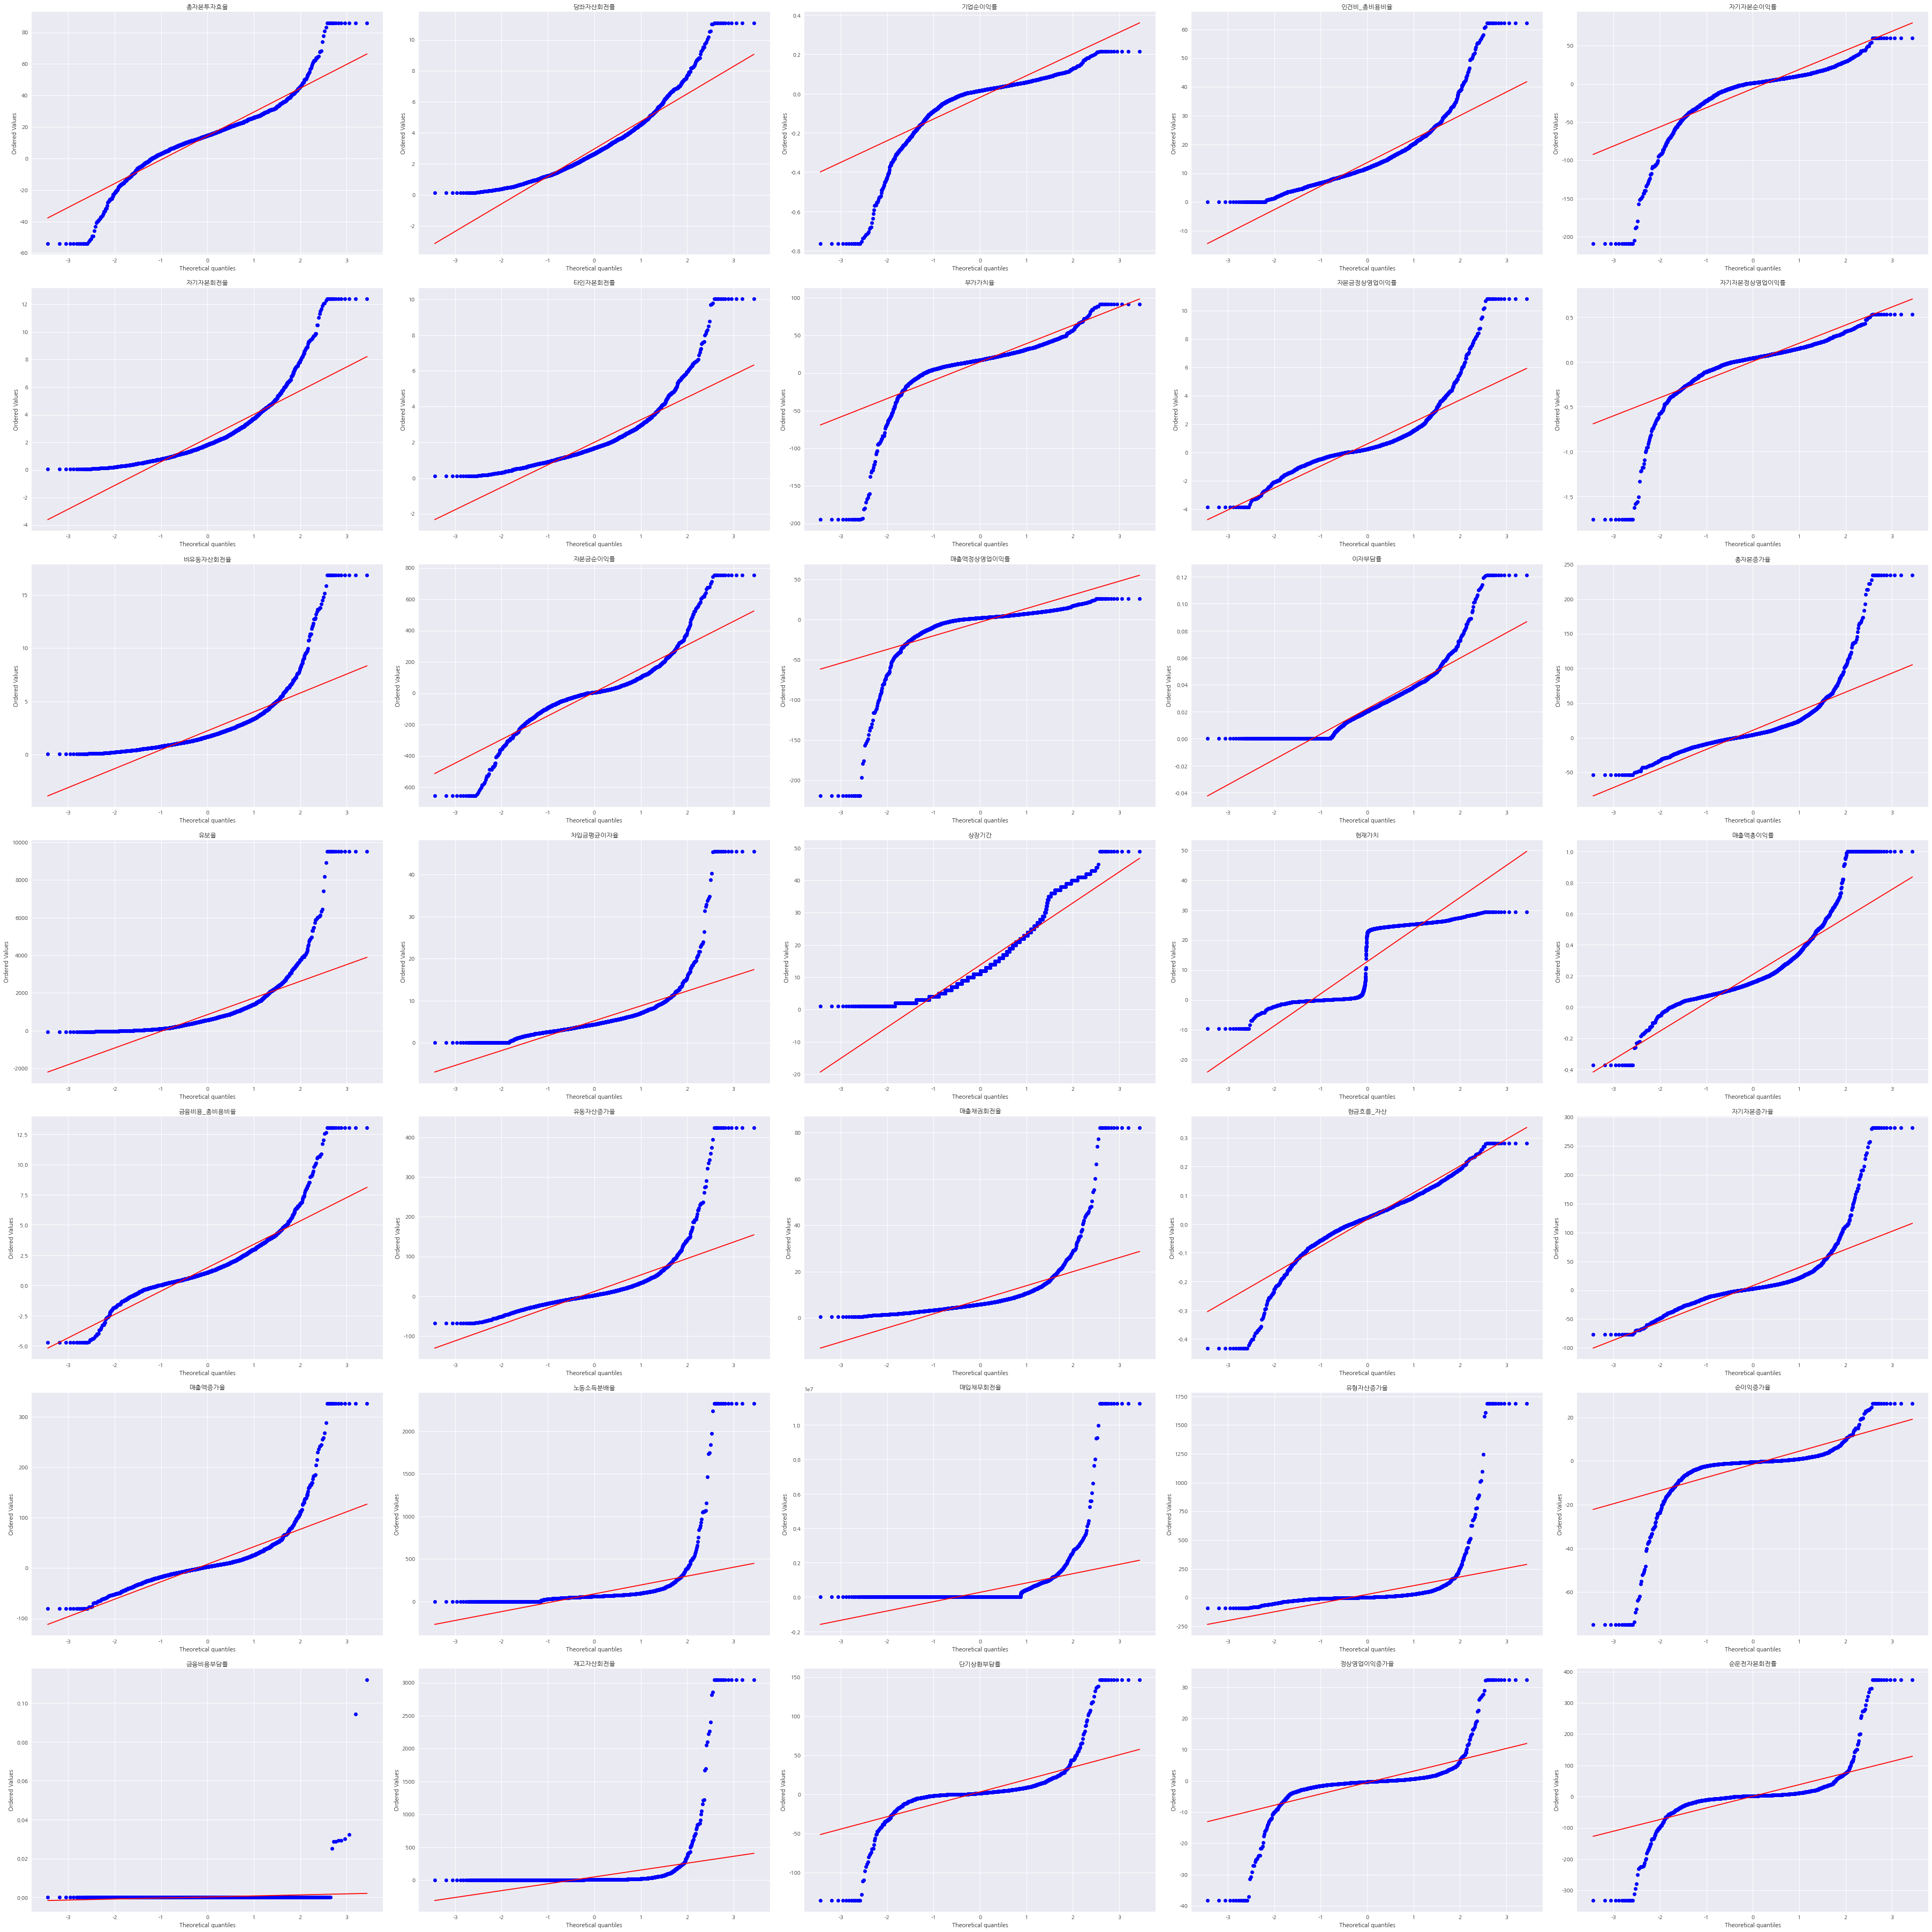

In [ ]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "NanumGothic"

ncols = 5
nrows = 7

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
fig.set_size_inches((50, 50))

for ax, i in zip(axs.ravel(), df_exvif):
       stats.probplot(df_exvif[i], dist=stats.norm, plot=ax)
       ax.set_title(str(i))

plt.show()

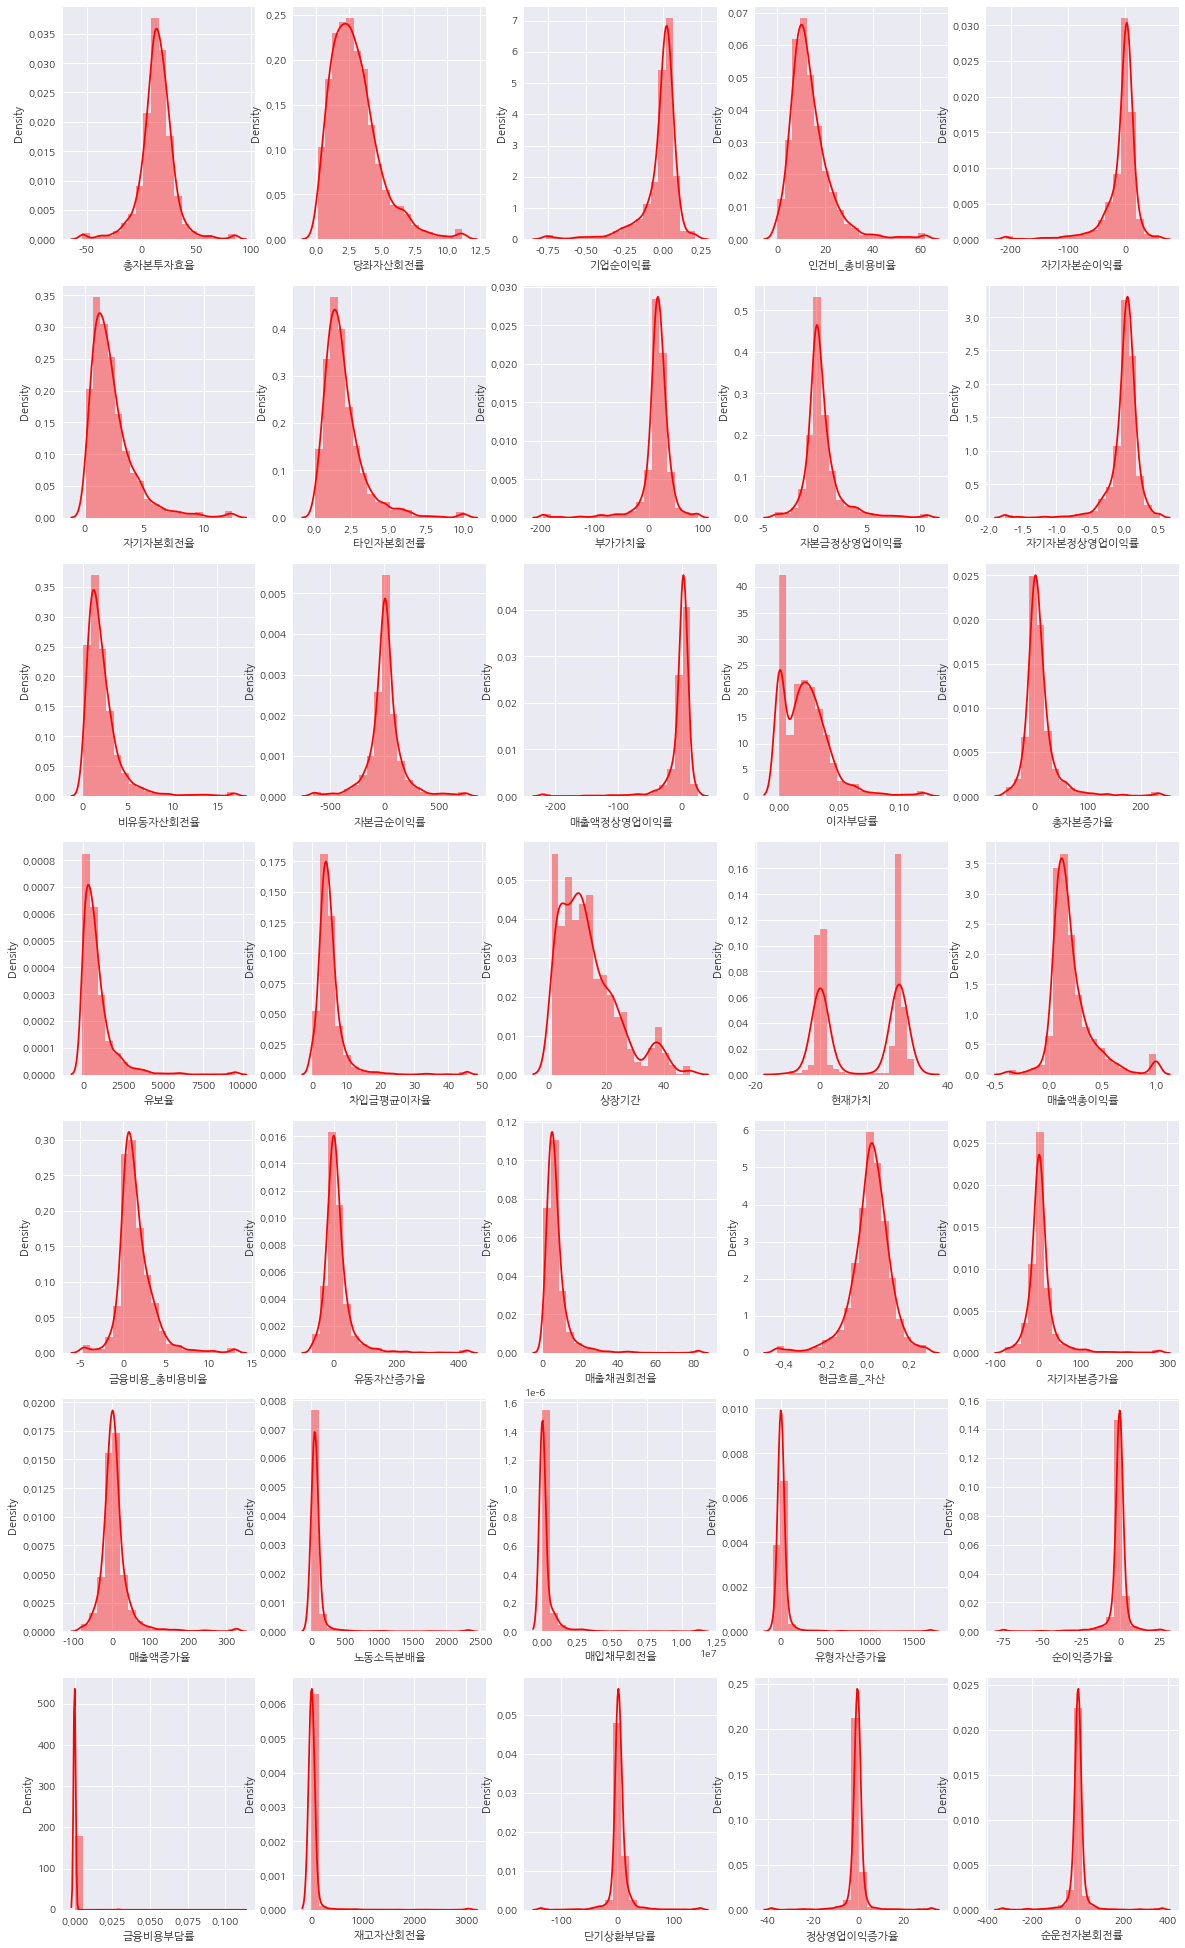

In [ ]:
# distplot
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False
col_n = 5
row_n = 7

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i, col in enumerate(df_exvif.columns[:]):
    sns.distplot(df_exvif[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)] , color='red')
  
# plt.tight_layout()

## 3_2. 등분산성 검정
- H0 : 모집단의 표준편차가 같다(등분산)
- H1 : 모집단의 표준편차가 다르다(이분산)
-> H가 1인 경우 이분산성

In [ ]:
y = df_total[['y']]
df_bart = pd.concat([df_exvif, y], axis=1)
df_bart

,총자본투자효율,당좌자산회전률,기업순이익률,인건비_총비용비율,자기자본순이익률,자기자본회전율,타인자본회전률,부가가치율,자본금정상영업이익률,자기자본정상영업이익률,...,노동소득분배율,매입채무회전율,유형자산증가율,순이익증가율,금융비용부담률,재고자산회전율,단기상환부담률,정상영업이익증가율,순운전자본회전률,y
0,12.72000,1.55332,-0.04859,15.94000,-8.28000,0.97000,2.01250,19.56000,0.02931,0.03550,...,89.82000,11.95000,-5.90288,-0.78283,0.00000,6.42000,0.00000,-1.08495,2.30132,0.00000
1,0.47000,0.57286,-0.10712,20.41000,-26.84000,0.66000,0.93453,1.66000,-0.12739,-0.13312,...,1749.87000,7.83000,-4.13061,3.41572,0.00000,5.71000,-0.02436,-7.56819,0.67698,1.00000
2,21.71000,1.85928,-0.08619,24.08000,-12.61000,1.36000,4.68262,22.56000,-0.31408,-0.09301,...,120.20000,19.72000,27.82222,1.93887,0.00000,10.05000,-0.03142,5.84062,2.29354,0.00000
3,38.87000,2.40072,-0.00664,26.91000,0.29000,1.40000,4.94157,32.14000,0.00764,0.00224,...,86.11000,36.32000,-26.24015,-0.92511,0.00000,11.55000,0.38557,-1.02447,3.01072,0.00000
4,3.04000,2.34600,-0.34844,19.55000,-40.47000,1.43000,10.01808,2.45000,-0.06382,-0.02749,...,1052.79000,47.35000,-31.58391,26.17361,0.00000,10.55000,-0.16076,-14.03616,2.22676,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,14.13000,5.70255,0.06127,3.78000,12.97000,5.50000,1.86735,10.48000,0.45621,0.12439,...,37.00000,18.34000,-7.30109,0.17749,0.00000,56.65000,5.50847,-0.41383,-9.08707,0.00000
2378,13.89000,5.43597,0.05390,5.16000,11.37000,5.11000,1.83866,10.93000,0.43839,0.11092,...,48.00000,17.07000,45.19195,0.01063,0.00000,59.77000,5.03346,-0.03906,-10.87118,0.00000
2379,13.11000,6.37728,0.03950,6.08000,6.18000,4.96000,1.53601,12.28000,0.50155,0.12274,...,50.65000,16.05000,49.35815,-0.42677,0.00000,68.48000,4.80772,0.14409,-8.12854,0.00000
2380,10.98000,7.96204,0.01092,8.11000,-9.40000,4.55000,1.20142,12.66000,0.09233,0.03063,...,66.49000,16.26000,38.84011,-2.63287,0.00000,56.47000,16.45915,-0.72247,-5.88154,0.00000


In [ ]:
from scipy.stats import bartlett
def bartlettTest(col, y0, y1, p_value = 0.05, H=1):

  list= []
  for i in col:
      t, p_val = bartlett(y0[i], y1[i]) 
      list.append([i, "{}".format(p_val)])

  data = pd.DataFrame(list, columns = ['x_feature', 'p_value'])

  data = data.astype({'p_value':'float'})
  if H == 1:
    data_h1 = data[data['p_value']< p_value]
    return data_h1
  else:
    data_h0 = data[data['p_value']>= p_value]
    return data_h0

In [ ]:
# 등분산
df_bart_h0= bartlettTest(df_bart.columns, df_bart[df_bart['y']==0], df_bart[df_bart['y']==1], H = 0)
df_bart_h0

,x_feature,p_value
0,총자본투자효율,0.23225
1,당좌자산회전률,0.11693
3,인건비_총비용비율,0.53402
5,자기자본회전율,0.96027
13,이자부담률,0.87839
17,상장기간,0.69021
19,매출액총이익률,0.18543
24,자기자본증가율,0.44371
25,매출액증가율,0.16686


In [ ]:
# 이분산
df_bart_h1= bartlettTest(df_bart.columns, df_bart[df_bart['y']==0], df_bart[df_bart['y']==1], H = 1)
df_bart_h1

,x_feature,p_value
2,기업순이익률,0.00000
4,자기자본순이익률,0.00000
6,타인자본회전률,0.00000
7,부가가치율,0.00000
8,자본금정상영업이익률,0.00000
9,자기자본정상영업이익률,0.00000
10,비유동자산회전율,0.00002
11,자본금순이익률,0.00013
12,매출액정상영업이익률,0.00000
14,총자본증가율,0.00000


## 3_3. 독립성 검정
-> 귀무가설 : 정규분포를 따른다.  
-> 무선표집(random_sampling)을 하였다면 만족하는 것으로 여김

# 4.feature_selection

## 4_1. t-test

In [ ]:
# 1. 각각의 데이터셋에 대해 t_test 진행 
import scipy.stats as stats
def t_test(col, df_h0, df_h1, y0, y1, p_value = 0.05):
  list= []
  for i in col:
    if (df_h0['x_feature']==i).any():
        t_stat, p_val = stats.ttest_ind(y0[i], y1[i], equal_var=True, alternative='two-sided')
        list.append([i, p_val])
    elif (df_h1['x_feature']==i).any():
        t_stat, p_val = stats.ttest_ind(y0[i], y1[i], equal_var=False, alternative='two-sided')
        list.append([i, p_val])

  df = pd.DataFrame(list, columns = ['x_feature', 'p_value'])
  a = df[(df['p_value'] < p_value)][['x_feature', 'p_value']].sort_values('p_value')
  return a

In [ ]:
# t_test 결과 p_value < 0.05보다 작은 유의한 변수 가져오기
x_ttest_sd = t_test(df_bart.columns, df_bart_h0, df_bart_h1, df_bart[df_bart['y']==0], df_bart[df_bart['y']==1], p_value=0.05)
x_ttest_sd

,x_feature,p_value
8,자본금정상영업이익률,0.00000
11,자본금순이익률,0.00000
6,타인자본회전률,0.00000
0,총자본투자효율,0.00000
9,자기자본정상영업이익률,0.00000
4,자기자본순이익률,0.00000
2,기업순이익률,0.00000
18,현재가치,0.00000
23,현금흐름_자산,0.00000
24,자기자본증가율,0.00000


In [ ]:
len(x_ttest_sd)

26

In [ ]:
# t_test 유의미한 변수 datasets 생성
t_list = x_ttest_sd['x_feature'].unique()
df_ttest = pd.DataFrame()

for i in t_list:
  df = x[[i]]
  df_ttest = pd.concat([df_ttest, df], axis=1)

df_ttest

,자본금정상영업이익률,자본금순이익률,타인자본회전률,총자본투자효율,자기자본정상영업이익률,자기자본순이익률,기업순이익률,현재가치,현금흐름_자산,자기자본증가율,...,비유동자산회전율,순이익증가율,유보율,정상영업이익증가율,당좌자산회전률,노동소득분배율,순운전자본회전률,매입채무회전율,상장기간,매출채권회전율
0,0.02931,-7.11000,2.01250,12.72000,0.03550,-8.28000,-0.04859,24.25839,-0.09377,-2.01576,...,1.38000,-0.78283,-17.45000,-1.08495,1.55332,89.82000,2.30132,11.95000,10,2.45000
1,-0.12739,-24.28000,0.93453,0.47000,-0.13312,-26.84000,-0.10712,25.19849,-0.02754,75.17467,...,1.48000,3.41572,-4.31000,-7.56819,0.57286,1749.87000,0.67698,7.83000,11,1.85000
2,-0.31408,-41.27000,4.68262,21.71000,-0.09301,-12.61000,-0.08619,24.62072,0.01997,-7.91863,...,2.49000,1.93887,227.25000,5.84062,1.85928,120.20000,2.29354,19.72000,9,4.27000
3,0.00764,0.98000,4.94157,38.87000,0.00224,0.29000,-0.00664,25.10827,0.11289,1.56449,...,2.37000,-0.92511,235.11000,-1.02447,2.40072,86.11000,3.01072,36.32000,10,12.19000
4,-0.06382,-109.33000,10.01808,3.04000,-0.02749,-40.47000,-0.34844,24.75218,0.05497,6.30206,...,3.62000,26.17361,128.55000,-14.03616,2.34600,1052.79000,2.22676,47.35000,11,15.18000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,0.45621,46.72000,1.86735,14.13000,0.12439,12.97000,0.06127,-1.51675,0.04709,24.61156,...,1.91000,0.17749,273.07000,-0.41383,5.70255,37.00000,-9.08707,18.34000,37,27.46000
2378,0.43839,43.32000,1.83866,13.89000,0.11092,11.37000,0.05390,-9.52059,0.00067,7.76069,...,1.86000,0.01063,301.53000,-0.03906,5.43597,48.00000,-10.87118,17.07000,38,26.03000
2379,0.50155,24.83000,1.53601,13.11000,0.12274,6.18000,0.03950,0.59070,0.04284,3.38943,...,1.47000,-0.42677,314.93000,0.14409,6.37728,50.65000,-8.12854,16.05000,39,25.33000
2380,0.09233,-32.34000,1.20142,10.98000,0.03063,-9.40000,0.01092,0.09784,-0.00145,11.21466,...,1.10000,-2.63287,205.62000,-0.72247,7.96204,66.49000,-5.88154,16.26000,40,25.24000


## 4_2. Lasso, Ridge, elasticnet

### Lasso

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
# lasso L1규제 (0으로)
lasso = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'))
lasso.fit(df_exvif, df_total['y'])
lasso_support = lasso.get_support()
lr_feature_sd = df_exvif.loc[:,lasso_support].columns.tolist()
print(str(len(lr_feature_sd)), 'selected features')

33 selected features


In [ ]:
# lasso 선택된 변수들만 모은 데이터 프레임 (y포함)
lr_feature_sd.append('y')
df_lasso = df_total[lr_feature_sd]
df_lasso

,총자본투자효율,당좌자산회전률,기업순이익률,인건비_총비용비율,자기자본순이익률,자기자본회전율,타인자본회전률,부가가치율,자본금정상영업이익률,자기자본정상영업이익률,...,자기자본증가율,매출액증가율,노동소득분배율,유형자산증가율,순이익증가율,재고자산회전율,단기상환부담률,정상영업이익증가율,순운전자본회전률,y
0,12.72000,1.55332,-0.04859,15.94000,-8.28000,0.97000,2.01250,19.56000,0.02931,0.03550,...,-2.01576,56.40529,89.82000,-5.90288,-0.78283,6.42000,0.00000,-1.08495,2.30132,0.00000
1,0.47000,0.57286,-0.10712,20.41000,-26.84000,0.66000,0.93453,1.66000,-0.12739,-0.13312,...,75.17467,-8.43285,1749.87000,-4.13061,3.41572,5.71000,-0.02436,-7.56819,0.67698,1.00000
2,21.71000,1.85928,-0.08619,24.08000,-12.61000,1.36000,4.68262,22.56000,-0.31408,-0.09301,...,-7.91863,21.63055,120.20000,27.82222,1.93887,10.05000,-0.03142,5.84062,2.29354,0.00000
3,38.87000,2.40072,-0.00664,26.91000,0.29000,1.40000,4.94157,32.14000,0.00764,0.00224,...,1.56449,4.85388,86.11000,-26.24015,-0.92511,11.55000,0.38557,-1.02447,3.01072,0.00000
4,3.04000,2.34600,-0.34844,19.55000,-40.47000,1.43000,10.47587,2.45000,-0.06382,-0.02749,...,6.30206,4.69172,1052.79000,-31.58391,44.81063,10.55000,-0.16076,-14.03616,2.22676,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,14.13000,5.70255,0.06127,3.78000,12.97000,5.50000,1.86735,10.48000,0.45621,0.12439,...,24.61156,5.97756,37.00000,-7.30109,0.17749,56.65000,5.50847,-0.41383,-9.08707,0.00000
2378,13.89000,5.43597,0.05390,5.16000,11.37000,5.11000,1.83866,10.93000,0.43839,0.11092,...,7.76069,7.17185,48.00000,45.19195,0.01063,59.77000,5.03346,-0.03906,-10.87118,0.00000
2379,13.11000,6.37728,0.03950,6.08000,6.18000,4.96000,1.53601,12.28000,0.50155,0.12274,...,3.38943,2.42018,50.65000,49.35815,-0.42677,68.48000,4.80772,0.14409,-8.12854,0.00000
2380,10.98000,7.96204,0.01092,8.11000,-9.40000,4.55000,1.20142,12.66000,0.09233,0.03063,...,11.21466,-1.58191,66.49000,38.84011,-2.63287,56.47000,16.45915,-0.72247,-5.88154,0.00000


### Ridge

In [ ]:
# ridge L2규제 (0으로 수렴)
ridge = SelectFromModel(LogisticRegression(C=1, penalty='l2',solver='liblinear'))
ridge.fit(df_exvif, df_total['y'])
ridge_support = ridge.get_support()
lr_feature_sd = df_exvif.loc[:,ridge_support].columns.tolist()
print(str(len(lr_feature_sd)), 'selected features')

12 selected features


In [ ]:
# ridge 선택된 변수들만 모은 데이터 프레임 (y포함)
lr_feature_sd.append('y')
df_ridge = df_total[lr_feature_sd]
df_ridge

,총자본투자효율,인건비_총비용비율,타인자본회전률,부가가치율,비유동자산회전율,총자본증가율,차입금평균이자율,상장기간,현재가치,매출채권회전율,자기자본증가율,매출액증가율,y
0,12.72000,15.94000,2.01250,19.56000,1.38000,1.98000,8.02000,10,24.25839,2.45000,-2.01576,56.40529,0.00000
1,0.47000,20.41000,0.93453,1.66000,1.48000,109.15000,5.45000,11,25.19849,1.85000,75.17467,-8.43285,1.00000
2,21.71000,24.08000,4.68262,22.56000,2.49000,-5.43000,14.84000,9,24.62072,4.27000,-7.91863,21.63055,0.00000
3,38.87000,26.91000,4.94157,32.14000,2.37000,-1.23000,33.83000,10,25.10827,12.19000,1.56449,4.85388,0.00000
4,3.04000,19.55000,10.47587,2.45000,3.62000,1.85000,20.31000,11,24.75218,15.18000,6.30206,4.69172,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,14.13000,3.78000,1.86735,10.48000,1.91000,7.03000,6.53000,37,-1.51675,27.46000,24.61156,5.97756,0.00000
2378,13.89000,5.16000,1.83866,10.93000,1.86000,13.69000,6.74000,38,-436.80172,26.03000,7.76069,7.17185,0.00000
2379,13.11000,6.08000,1.53601,12.28000,1.47000,21.93000,8.33000,39,0.59070,25.33000,3.38943,2.42018,0.00000
2380,10.98000,8.11000,1.20142,12.66000,1.10000,21.08000,10.67000,40,0.09784,25.24000,11.21466,-1.58191,0.00000


### elastic_net

In [ ]:
# elasticnet
elasticnet = SelectFromModel(LogisticRegression(C=1, penalty='elasticnet',solver='saga', l1_ratio=0))
elasticnet.fit(df_exvif, df_total['y'])
ridge_support = elasticnet.get_support()
lr_feature_sd = df_exvif.loc[:,ridge_support].columns.tolist()
print(str(len(lr_feature_sd)), 'selected features')

3 selected features


In [ ]:
# elasticnet 선택된 변수들만 모은 데이터 프레임 (y포함)
lr_feature_sd.append('y')
df_elasticnet0 = df_total[lr_feature_sd]
df_elasticnet0.head()

,자본금순이익률,유보율,매입채무회전율,y
0,-7.11000,-17.45000,11.95000,0.00000
1,-24.28000,-4.31000,7.83000,1.00000
2,-41.27000,227.25000,19.72000,0.00000
3,0.98000,235.11000,36.32000,0.00000
4,-109.33000,128.55000,47.35000,0.00000


In [ ]:
# elasticnet
elasticnet = SelectFromModel(LogisticRegression(C=1, penalty='elasticnet',solver='saga', l1_ratio=1))
elasticnet.fit(df_exvif, df_total['y'])
ridge_support = elasticnet.get_support()
lr_feature_sd = df_exvif.loc[:,ridge_support].columns.tolist()
print(str(len(lr_feature_sd)), 'selected features')

3 selected features


In [ ]:
# elasticnet 선택된 변수들만 모은 데이터 프레임 (y포함)
lr_feature_sd.append('y')
df_elasticnet1 = df_total[lr_feature_sd]
df_elasticnet1.head()

,자본금순이익률,유보율,매입채무회전율,y
0,-7.11000,-17.45000,11.95000,0.00000
1,-24.28000,-4.31000,7.83000,1.00000
2,-41.27000,227.25000,19.72000,0.00000
3,0.98000,235.11000,36.32000,0.00000
4,-109.33000,128.55000,47.35000,0.00000


## 4_3. forward, backstep, stepwise

In [ ]:
import statsmodels.api as sm

In [ ]:
## 전진 선택법

# feature, target 분리
# 독립변수 리스트
variables = df_exvif.columns.tolist() 
# 종속변수
y = df_total['y']
 
# 선택된 변수들
fstep_selected_variables = []
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(fstep_selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df_exvif[fstep_selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        fstep_selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df_exvif[fstep_selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(fstep_selected_variables.copy())
    else:
        break

In [ ]:
fstep_selected_variables

['자본금순이익률',
 '자기자본정상영업이익률',
 '타인자본회전률',
 '금융비용_총비용비율',
 '총자본증가율',
 '자기자본증가율',
 '매출액총이익률',
 '자본금정상영업이익률',
 '유보율',
 '자기자본회전율',
 '정상영업이익증가율',
 '순운전자본회전률',
 '현재가치',
 '차입금평균이자율',
 '이자부담률',
 '매출액증가율',
 '순이익증가율']

In [ ]:
len(fstep_selected_variables)

17

In [ ]:
## 후진 제거법

# feature, target 분리
# 독립변수 리스트
variables = df_exvif.columns.tolist() 
# 종속변수
y = df_total['y']
 
# 선택된 변수들
bstep_selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(bstep_selected_variables) > 0:
    X = sm.add_constant(df_exvif[bstep_selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        bstep_selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df_exvif[bstep_selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(bstep_selected_variables.copy())
    else:
        break

In [ ]:
bstep_selected_variables

['기업순이익률',
 '자기자본순이익률',
 '자기자본회전율',
 '타인자본회전률',
 '자본금정상영업이익률',
 '자기자본정상영업이익률',
 '자본금순이익률',
 '이자부담률',
 '총자본증가율',
 '유보율',
 '차입금평균이자율',
 '현재가치',
 '매출액총이익률',
 '금융비용_총비용비율',
 '자기자본증가율',
 '매출액증가율',
 '정상영업이익증가율',
 '순운전자본회전률']

In [ ]:
len(bstep_selected_variables)

18

In [ ]:
# stepwise 단계별 선택법

# feature, target 분리
# 독립변수 리스트
variables = df_exvif.columns.tolist() 
# 종속변수
y = df_total['y']

step_selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(step_selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df_exvif[step_selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        step_selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(step_selected_variables) > 0:
            selected_X = df_exvif[step_selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                step_selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df_exvif[step_selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(step_selected_variables.copy())
    else:
        break

In [ ]:
step_selected_variables

['자본금순이익률',
 '자기자본정상영업이익률',
 '타인자본회전률',
 '금융비용_총비용비율',
 '총자본증가율',
 '자기자본증가율',
 '매출액총이익률',
 '자본금정상영업이익률',
 '유보율',
 '자기자본회전율',
 '정상영업이익증가율',
 '순운전자본회전률',
 '현재가치',
 '차입금평균이자율',
 '이자부담률',
 '매출액증가율',
 '순이익증가율']

In [ ]:
len(step_selected_variables)

17

## 4_4. select 변수들

In [ ]:
lasso_list = df_lasso.columns[:-1] # y제외
lasso_list

Index(['총자본투자효율', '당좌자산회전률', '기업순이익률', '인건비_총비용비율', '자기자본순이익률', '자기자본회전율',
       '타인자본회전률', '부가가치율', '자본금정상영업이익률', '자기자본정상영업이익률', '비유동자산회전율', '자본금순이익률',
       '매출액정상영업이익률', '이자부담률', '총자본증가율', '유보율', '차입금평균이자율', '상장기간', '현재가치',
       '매출액총이익률', '금융비용_총비용비율', '유동자산증가율', '매출채권회전율', '현금흐름_자산', '자기자본증가율',
       '매출액증가율', '노동소득분배율', '유형자산증가율', '순이익증가율', '재고자산회전율', '단기상환부담률',
       '정상영업이익증가율', '순운전자본회전률'],
      dtype='object')

In [ ]:
intersection_step = list(set(lasso_list) & set(t_list) & set(step_selected_variables))
intersection_step

['자본금정상영업이익률',
 '순이익증가율',
 '금융비용_총비용비율',
 '유보율',
 '이자부담률',
 '매출액증가율',
 '자본금순이익률',
 '순운전자본회전률',
 '타인자본회전률',
 '자기자본정상영업이익률',
 '정상영업이익증가율',
 '매출액총이익률',
 '현재가치',
 '자기자본증가율']

In [ ]:
intersection_bstep = list(set(lasso_list) & set(t_list) & set(bstep_selected_variables))
intersection_bstep

['자본금정상영업이익률',
 '유보율',
 '매출액증가율',
 '이자부담률',
 '금융비용_총비용비율',
 '자본금순이익률',
 '순운전자본회전률',
 '타인자본회전률',
 '자기자본정상영업이익률',
 '정상영업이익증가율',
 '자기자본순이익률',
 '기업순이익률',
 '매출액총이익률',
 '현재가치',
 '자기자본증가율']

In [ ]:
intersection_fstep = list(set(lasso_list) & set(t_list) & set(fstep_selected_variables))
intersection_fstep

['자본금정상영업이익률',
 '순이익증가율',
 '금융비용_총비용비율',
 '유보율',
 '이자부담률',
 '매출액증가율',
 '자본금순이익률',
 '순운전자본회전률',
 '타인자본회전률',
 '자기자본정상영업이익률',
 '정상영업이익증가율',
 '매출액총이익률',
 '현재가치',
 '자기자본증가율']

In [ ]:
list(set(intersection_fstep) ^ set(intersection_bstep))

['순이익증가율', '자기자본순이익률', '기업순이익률']

In [ ]:
list(set(intersection_fstep) ^ set(intersection_step))

[]

In [ ]:
list(set(intersection_step) ^ set(intersection_bstep))

['순이익증가율', '자기자본순이익률', '기업순이익률']

In [ ]:
# heatmap 시각화
df_inter = pd.DataFrame()

for i in intersection_step:
  df = df_exvif[[i]]
  df_inter = pd.concat([df_inter, df], axis=1)

df_inter.head()

,자본금정상영업이익률,순이익증가율,금융비용_총비용비율,유보율,이자부담률,매출액증가율,자본금순이익률,순운전자본회전률,타인자본회전률,자기자본정상영업이익률,정상영업이익증가율,매출액총이익률,현재가치,자기자본증가율
0,0.02931,-0.78283,0.72000,-17.45000,0.01957,56.40529,-7.11000,2.30132,2.01250,0.03550,-1.08495,0.41832,24.25839,-2.01576
1,-0.12739,3.41572,1.78000,-4.31000,0.02127,-8.43285,-24.28000,0.67698,0.93453,-0.13312,-7.56819,0.28340,25.19849,75.17467
2,-0.31408,1.93887,-0.87000,227.25000,0.00091,21.63055,-41.27000,2.29354,4.68262,-0.09301,5.84062,0.27919,24.62072,-7.91863
3,0.00764,-0.92511,-0.64000,235.11000,0.00809,4.85388,0.98000,3.01072,4.94157,0.00224,-1.02447,0.28016,25.10827,1.56449
4,-0.06382,26.17361,-0.39000,128.55000,0.00653,4.69172,-109.33000,2.22676,10.01808,-0.02749,-14.03616,0.24760,24.75218,6.30206


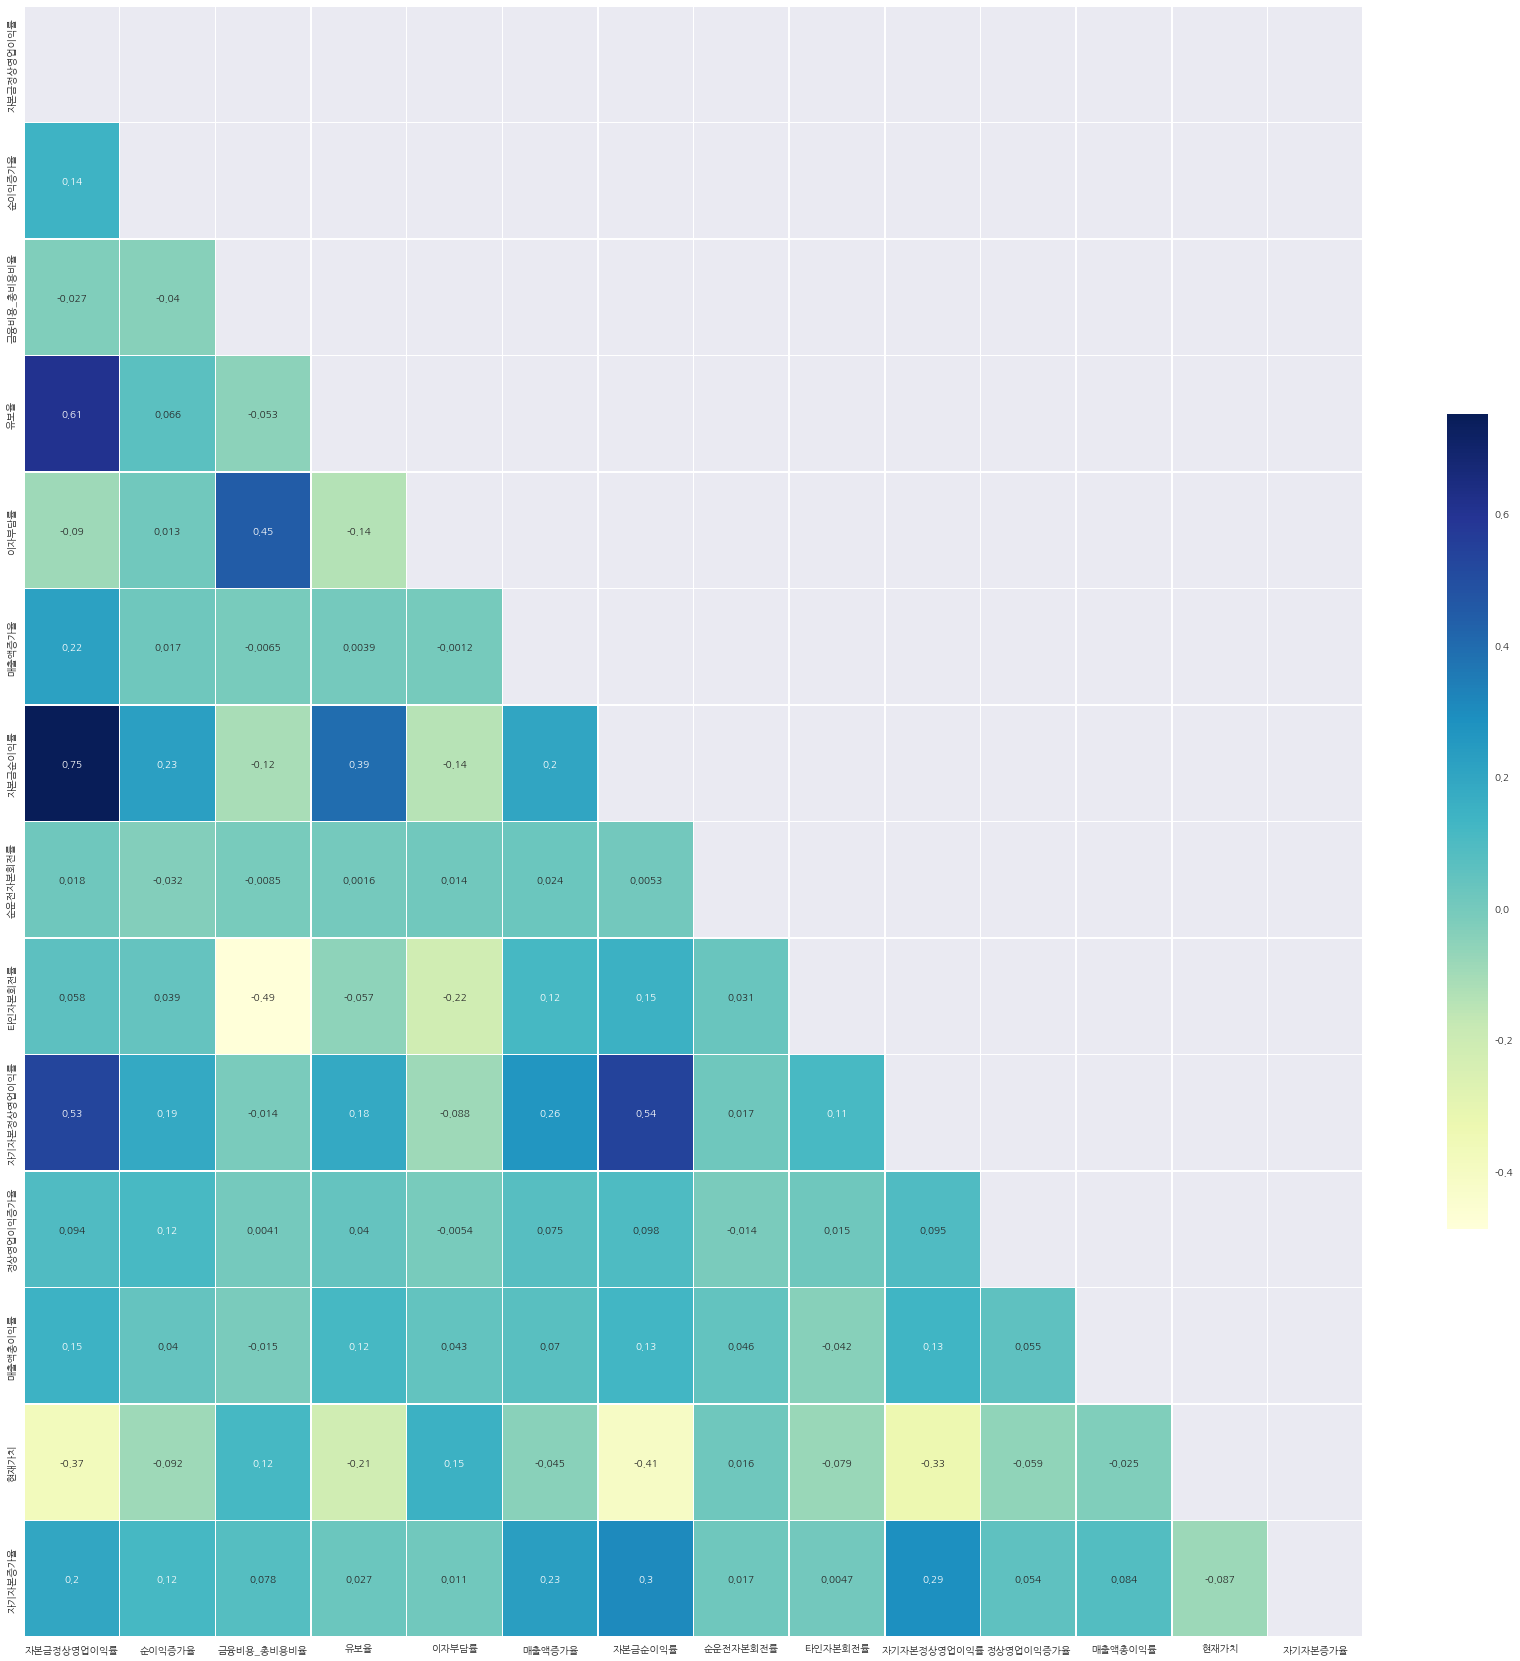

In [ ]:
# 상관행렬 시각화
mask_ut=np.triu(np.ones(df_inter.corr().shape)).astype(bool)  # 배열 행렬에 위쪽 삼각형 반환 -> True
plt.figure(figsize=(30,30))
sns.heatmap(df_inter.corr(method='pearson'), annot = True, cmap = 'YlGnBu', cbar_kws={"shrink": .5}, 
              annot_kws={"size": 10}, linewidths=.5, mask=mask_ut)
plt.show()

# 1차 x에 대한 feature selection 끝



---



---

